In [55]:
import warnings

# Ignore specific future warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Assignment No. 2 
### Data exploration and enrichment for supervised classification

## Table of contents

1. [Introduction](#Introduction)

2. [Required libraries](#Required-libraries)

3. [The problem domain](#The-problem-domain)

4. [Step 1: Answering the question](#Step-1:-Answering-the-question)

5. [Step 2: Checking the data](#Step-2:-Checking-the-data)

    - [Underlying problem](#Underlying-problem)

7. [Step 3: Tidying the data](#Step-3:-Tidying-the-data)

8. [Step 4: Exploratory analysis](#Step-4:-Exploratory-analysis)

9. [Step 5: Classification](#Step-5:-Classification)

10. [Conclusions](#Conclusions)


## Introduction

[[ go back to the top ]](#Table-of-contents)

In the realm of healthcare, predictive analytics plays a crucial role in improving patient outcomes and optimizing treatment strategies. One particular area of interest is hepatocellular carcinoma (HCC), a common type of liver cancer that poses significant challenges for early detection and effective treatment. In this data science project, we have been assigned the task of developing a categorical machine learning model using an HCC dataset. This model aims to predict the categorization of patients based on various clinical and demographic features, thereby assisting medical professionals in making informed decisions.

## Required libraries

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## The problem domain

[[ go back to the top ]](#Table-of-contents)

Liver cancer kills approximately 800 thousand people annually worldwide, and its most common subtype is hepatocellular carcinoma (HCC), which usually affects people with cirrhosis. Predicting survival of patients with HCC remains an important challenge, especially because technologies needed for this scope are not available in all hospitals. In this context, machine learning applied to medical records can be a fast, low-cost tool to predict survival and detect the most predictive features from health records. 

We've been given a [data set](https://github.com/gabyru12/Data_science_project/blob/main/hcc_dataset.csv) from our data science teacher and in this study, we'll be analysing medical data of 165 patients with HCC. The goal is to address a real data science use case from data cleaning and feature assessment to visual inspection and communication of results while also developing a machine learning pipeline capable of determining the survivability of patients at 1 year after diagnosis

**Note:** The data set we're working with was collected at the Coimbra Hospital and University Center (CHUC) in Portugal and contains real clinical data of patients diagnosed with HCC.

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

>What is the type of data analytic (e.g. exploration, association causality)?

We're trying to classify the survivability of a patient after 1 year of being diagnosed ("Class") based on 49 different features that may or may not have and influence on how likely they are to die 1 year from now.

>How are we going to measure the success of our classification algorithm?

Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) as our main evaluation metric to quantify how well our model is performing. We are aiming to achieve at least 90% accuracy.

Besides accuracy, there are also other evalution metric that we will touch on for the sake of the project.

>Why are we doing this?

Data science has many aplications in the real world and since it's so relevant we were given a small scale project of real world clinical trials in order to put our knownledge to use and grasp what's the essence of being a data analyst.

>Will we be able to create a definitive model capable of determining whether a patient is going to die one year from the moment he/she was diagnosed?

The data set we currently have has only 165 cases and 49 features that may not fully represent the complexity of the human body. What we're trying to say is there are too many factor that influence the survivability of a patient with this type of cancer and added to the fact that we only have 165 cases, our model may not even be trustworthy even with an outstanding 99% accuracy score.

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

An initial exploratory data analysis should be carried out including examining feature types, number of features/records, class distribution, values per attribute, etc., and highlighting feature inconsistencies such as missing values, outliers, underrepresented concepts, irrelevant features, etc. The analysis can and should be supported with visualization techniques.

In [57]:
pd.set_option('display.max_columns', None)
hccdf = pd.read_csv('hcc_dataset.csv')
hccdf

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,?,?,Active,NaN,NaN,0.84,?,15.4,109.2,9.3,184000,4.6,0.5,35,40,449,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,No,No,No,Yes,No,?,No,Yes,Yes,Yes,No,No,Yes,68,0,0,Ambulatory,NaN,NaN,1.33,4887,12.1,88.9,2.5,141,3,3.6,50,91,147,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,?,?,?,?,No,No,Yes,65,?,48,Active,NaN,NaN,1.13,75,13.3,90,8,385000,4.3,0.6,53,52,164,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,?,?,?,Yes,Yes,Yes,44,?,?,Ambulatory,NaN,NaN,2.14,94964,15.6,117.3,5200,118000,4.8,1.1,50,60,320,170,8.4,0.74,5,18,?,?,?,?,Dies


The first row in the data file defines the column headers/features.

Each row following the first row represents an entry for a patient: 49 features and 1 class, which tells us the survivability of the patient.

**One of the first things we should look for is missing data, in this case represented by ?.** 

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [58]:
# identify missing values as ?
hccdf = pd.read_csv('hcc_dataset.csv', na_values=['?'], sep=",")
# read_csv understand "None" value as being "NaN" so we have to replace every "NaN" value in Ascites and Encephalopathy to "None"
hccdf.loc[hccdf["Ascites"].isnull(),"Ascites"] = "None" 
hccdf.loc[hccdf["Encephalopathy"].isnull(),"Encephalopathy"] = "None"

Unfortunately, the column " Albunim" has a white space at the beginning, so to avoid dealing with this problem later one, we'll strip every column so as not to leave any white spaces if we decide to investigate each one individually.
We'll also do it to each existing value.

In [59]:
list0 = []
for i in range(len(hccdf.columns)):
    list0.append(hccdf.columns[i].strip())
    if hccdf[hccdf.columns[i]].dtype == object: hccdf[hccdf.columns[i]].str.strip()
hccdf.columns = list0

---

Having made some changes to correct the data set we are about to analyze let us finally have a look into it.

In [60]:
hccdf

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,None,None,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,None,None,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,None,None,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,NaN,NaN,Active,None,None,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes,68,0.0,0.0,Ambulatory,None,None,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,No,No,Yes,65,NaN,48.0,Active,None,None,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,Yes,44,NaN,NaN,Ambulatory,None,None,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


By the given table we understand that we have **165** cases each **50** features (variables/columns) being analized.

Now let's see how many cases have **no missing data**.

In [61]:
data_set_noNullValues = hccdf.copy()
data_set_noNullValues.dropna(inplace=True)
data_set_noNullValues 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
15,Female,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,41,100.0,0.0,Restricted,None,Mild,1.61,4.6,10.2,89.6,5.5,161.0,3.1,3.1,24.0,57.0,163.0,176.0,5.0,0.80,2.0,2.6,1.3,25.0,13.0,60.0,Lives
28,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,61,60.0,67.5,Restricted,None,None,1.30,3255.0,12.2,89.5,4.4,108.0,3.0,1.1,59.0,85.0,419.0,293.0,7.7,0.67,2.0,6.5,0.4,94.0,27.0,70.0,Dies
61,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,56,100.0,40.0,Active,Grade I/II,Mild,1.46,41.0,14.6,100.8,5.5,42000.0,3.1,3.7,121.0,165.0,101.0,207.0,6.3,0.69,1.0,3.0,1.9,224.0,95.0,363.0,Lives
67,Male,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,63,100.0,0.0,Active,None,None,2.07,1.7,9.5,99.2,3300.0,79000.0,2.1,1.6,56.0,82.0,134.0,113.0,37.0,0.40,1.0,2.7,0.2,94.0,37.0,48.0,Lives
90,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,69,100.0,0.0,Ambulatory,None,Moderate/Severe,1.41,123.0,10.1,89.5,2.3,89000.0,4.0,4.3,31.0,60.0,75.0,177.0,6.8,0.70,3.0,3.5,1.0,37.0,11.0,173.0,Dies
108,Male,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,85,100.0,0.0,Restricted,None,None,1.25,173.0,11.3,103.9,6200.0,176000.0,2.4,1.7,63.0,114.0,80.0,163.0,6.1,0.67,5.0,20.0,0.5,131.0,78.0,1316.0,Dies
122,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,51,75.0,52.5,Ambulatory,None,None,1.56,50655.0,9.8,85.6,3900.0,132000.0,2.6,2.6,123.0,219.0,503.0,363.0,7.3,0.55,1.0,4.0,1.5,40.0,12.0,57.0,Dies


It appears that we only have **8 perfect cases**.

To get general info on how many values we have in each column and what data type it is we can use the following function:

In [62]:
#Column: (number of Non-Null elements, data type)
hccdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

Given this information about the table we can infer that there are some **missing values** in certain features. Particularly, **[Iron,Sat, Ferritin]** contain only 50% of valuable data, the rest being missing data, a problem we'll have to deal with later during **data processing/cleaning**.

In [63]:
hccdf.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


The **describe()** function provides a general overview of the data contained within the 23 features with a numerical data type.

In order to later on visualize and undertstand the graphs for each feature, we'll have to separate the numerical data type features from the object data type ones.

In [64]:
hccdf_object_cols = hccdf.select_dtypes(include=['object'])
hccdf_numerical_cols = hccdf.select_dtypes(include=['int',"float"])
print(f"Object features: {hccdf_object_cols.columns.values}")
print(f"Numerical features: {hccdf_numerical_cols.columns.values}")

Object features: ['Gender' 'Symptoms' 'Alcohol' 'HBsAg' 'HBeAg' 'HBcAb' 'HCVAb' 'Cirrhosis'
 'Endemic' 'Smoking' 'Diabetes' 'Obesity' 'Hemochro' 'AHT' 'CRI' 'HIV'
 'NASH' 'Varices' 'Spleno' 'PHT' 'PVT' 'Metastasis' 'Hallmark' 'PS'
 'Encephalopathy' 'Ascites' 'Class']
Numerical features: ['Age' 'Grams_day' 'Packs_year' 'INR' 'AFP' 'Hemoglobin' 'MCV'
 'Leucocytes' 'Platelets' 'Albumin' 'Total_Bil' 'ALT' 'AST' 'GGT' 'ALP'
 'TP' 'Creatinine' 'Nodules' 'Major_Dim' 'Dir_Bil' 'Iron' 'Sat' 'Ferritin']


In [65]:
for col in hccdf_object_cols:
    unique_values = hccdf[col].dropna().unique()
    sorted_values = sorted(unique_values.tolist())
    print(f"{col}: {sorted_values}")

Gender: ['Female', 'Male']
Symptoms: ['No', 'Yes']
Alcohol: ['No', 'Yes']
HBsAg: ['No', 'Yes']
HBeAg: ['No', 'Yes']
HBcAb: ['No', 'Yes']
HCVAb: ['No', 'Yes']
Cirrhosis: ['No', 'Yes']
Endemic: ['No', 'Yes']
Smoking: ['No', 'Yes']
Diabetes: ['No', 'Yes']
Obesity: ['No', 'Yes']
Hemochro: ['No', 'Yes']
AHT: ['No', 'Yes']
CRI: ['No', 'Yes']
HIV: ['No', 'Yes']
NASH: ['No', 'Yes']
Varices: ['No', 'Yes']
Spleno: ['No', 'Yes']
PHT: ['No', 'Yes']
PVT: ['No', 'Yes']
Metastasis: ['No', 'Yes']
Hallmark: ['No', 'Yes']
PS: ['Active', 'Ambulatory', 'Disabled', 'Restricted', 'Selfcare']
Encephalopathy: ['Grade I/II', 'Grade III/IV', 'None']
Ascites: ['Mild', 'Moderate/Severe', 'None']
Class: ['Dies', 'Lives']


---

### **Graphs**

Let's analize each feature with **numerical** data type while also taking into account the **"Class"** that each case falls into by creating **violin plots** that depict the distribution of numeric data for the two existing classes ("Lives" or "Dies") using density curves.

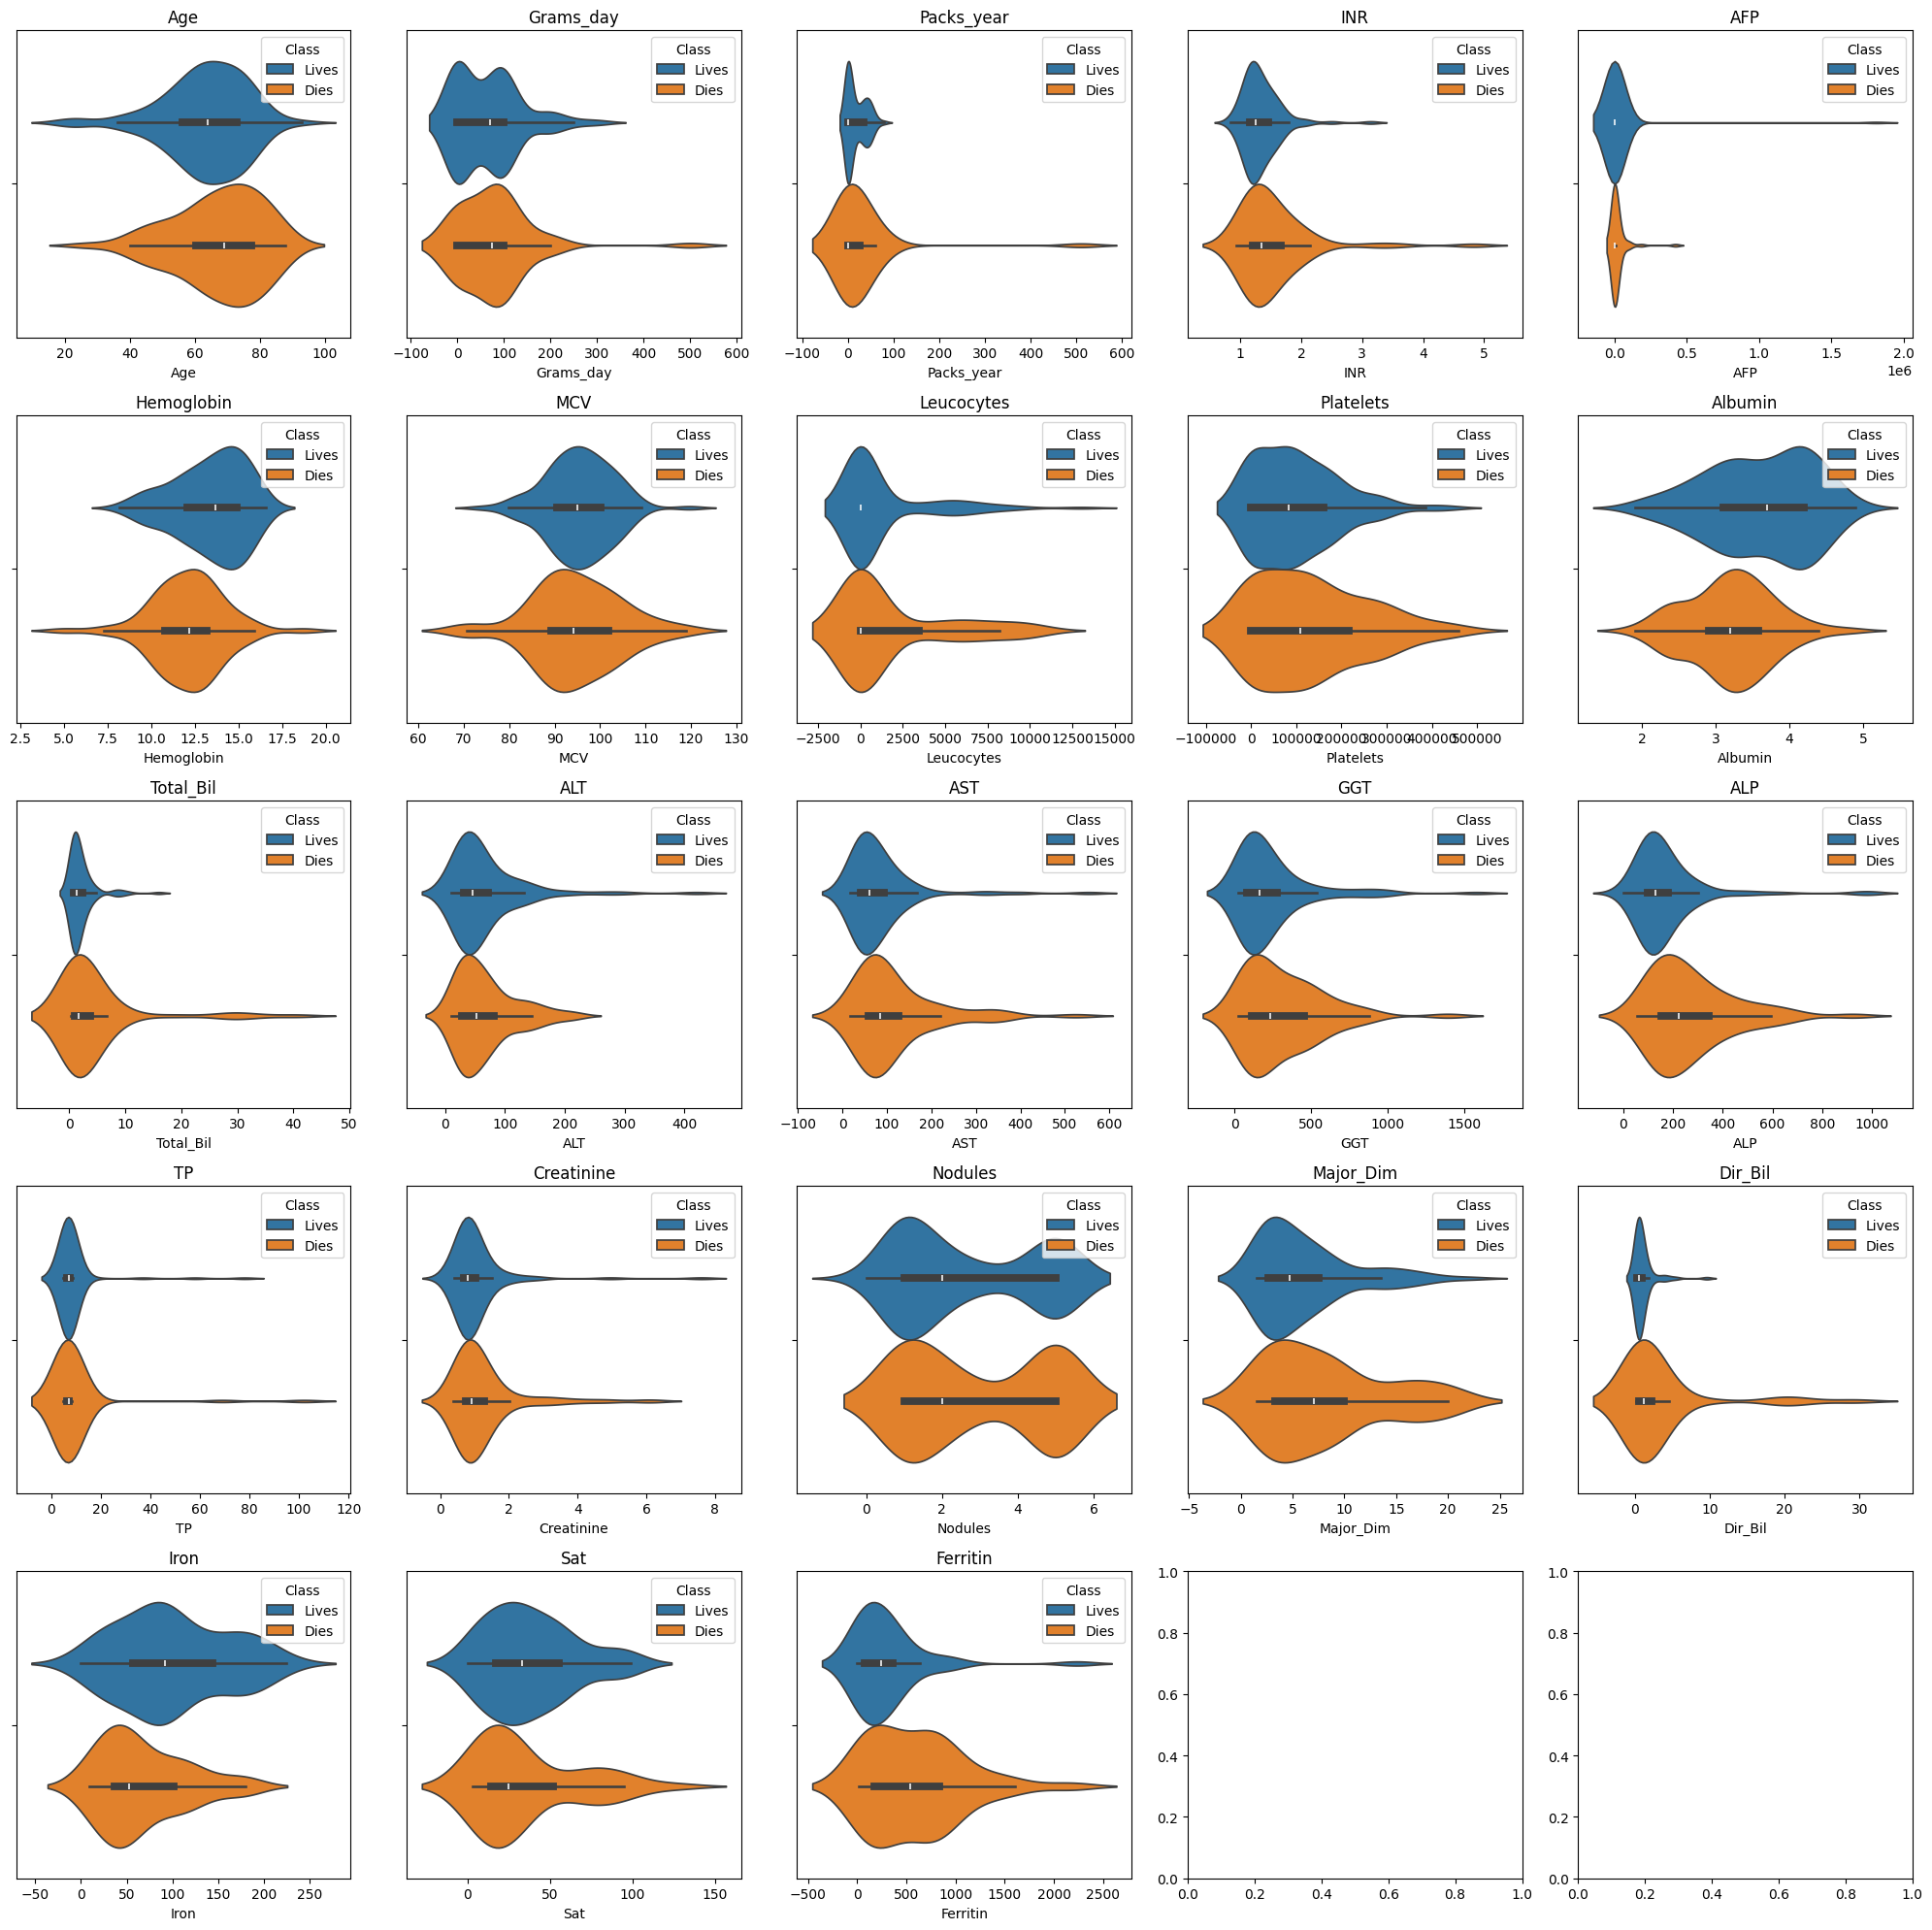

In [66]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

for idx, column in enumerate(hccdf_numerical_cols.columns):
    sb.violinplot(x = column, hue="Class", data = hccdf, ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

To get a better and more detailed view of each case that can be ploted, we'll create a **strip plot**.

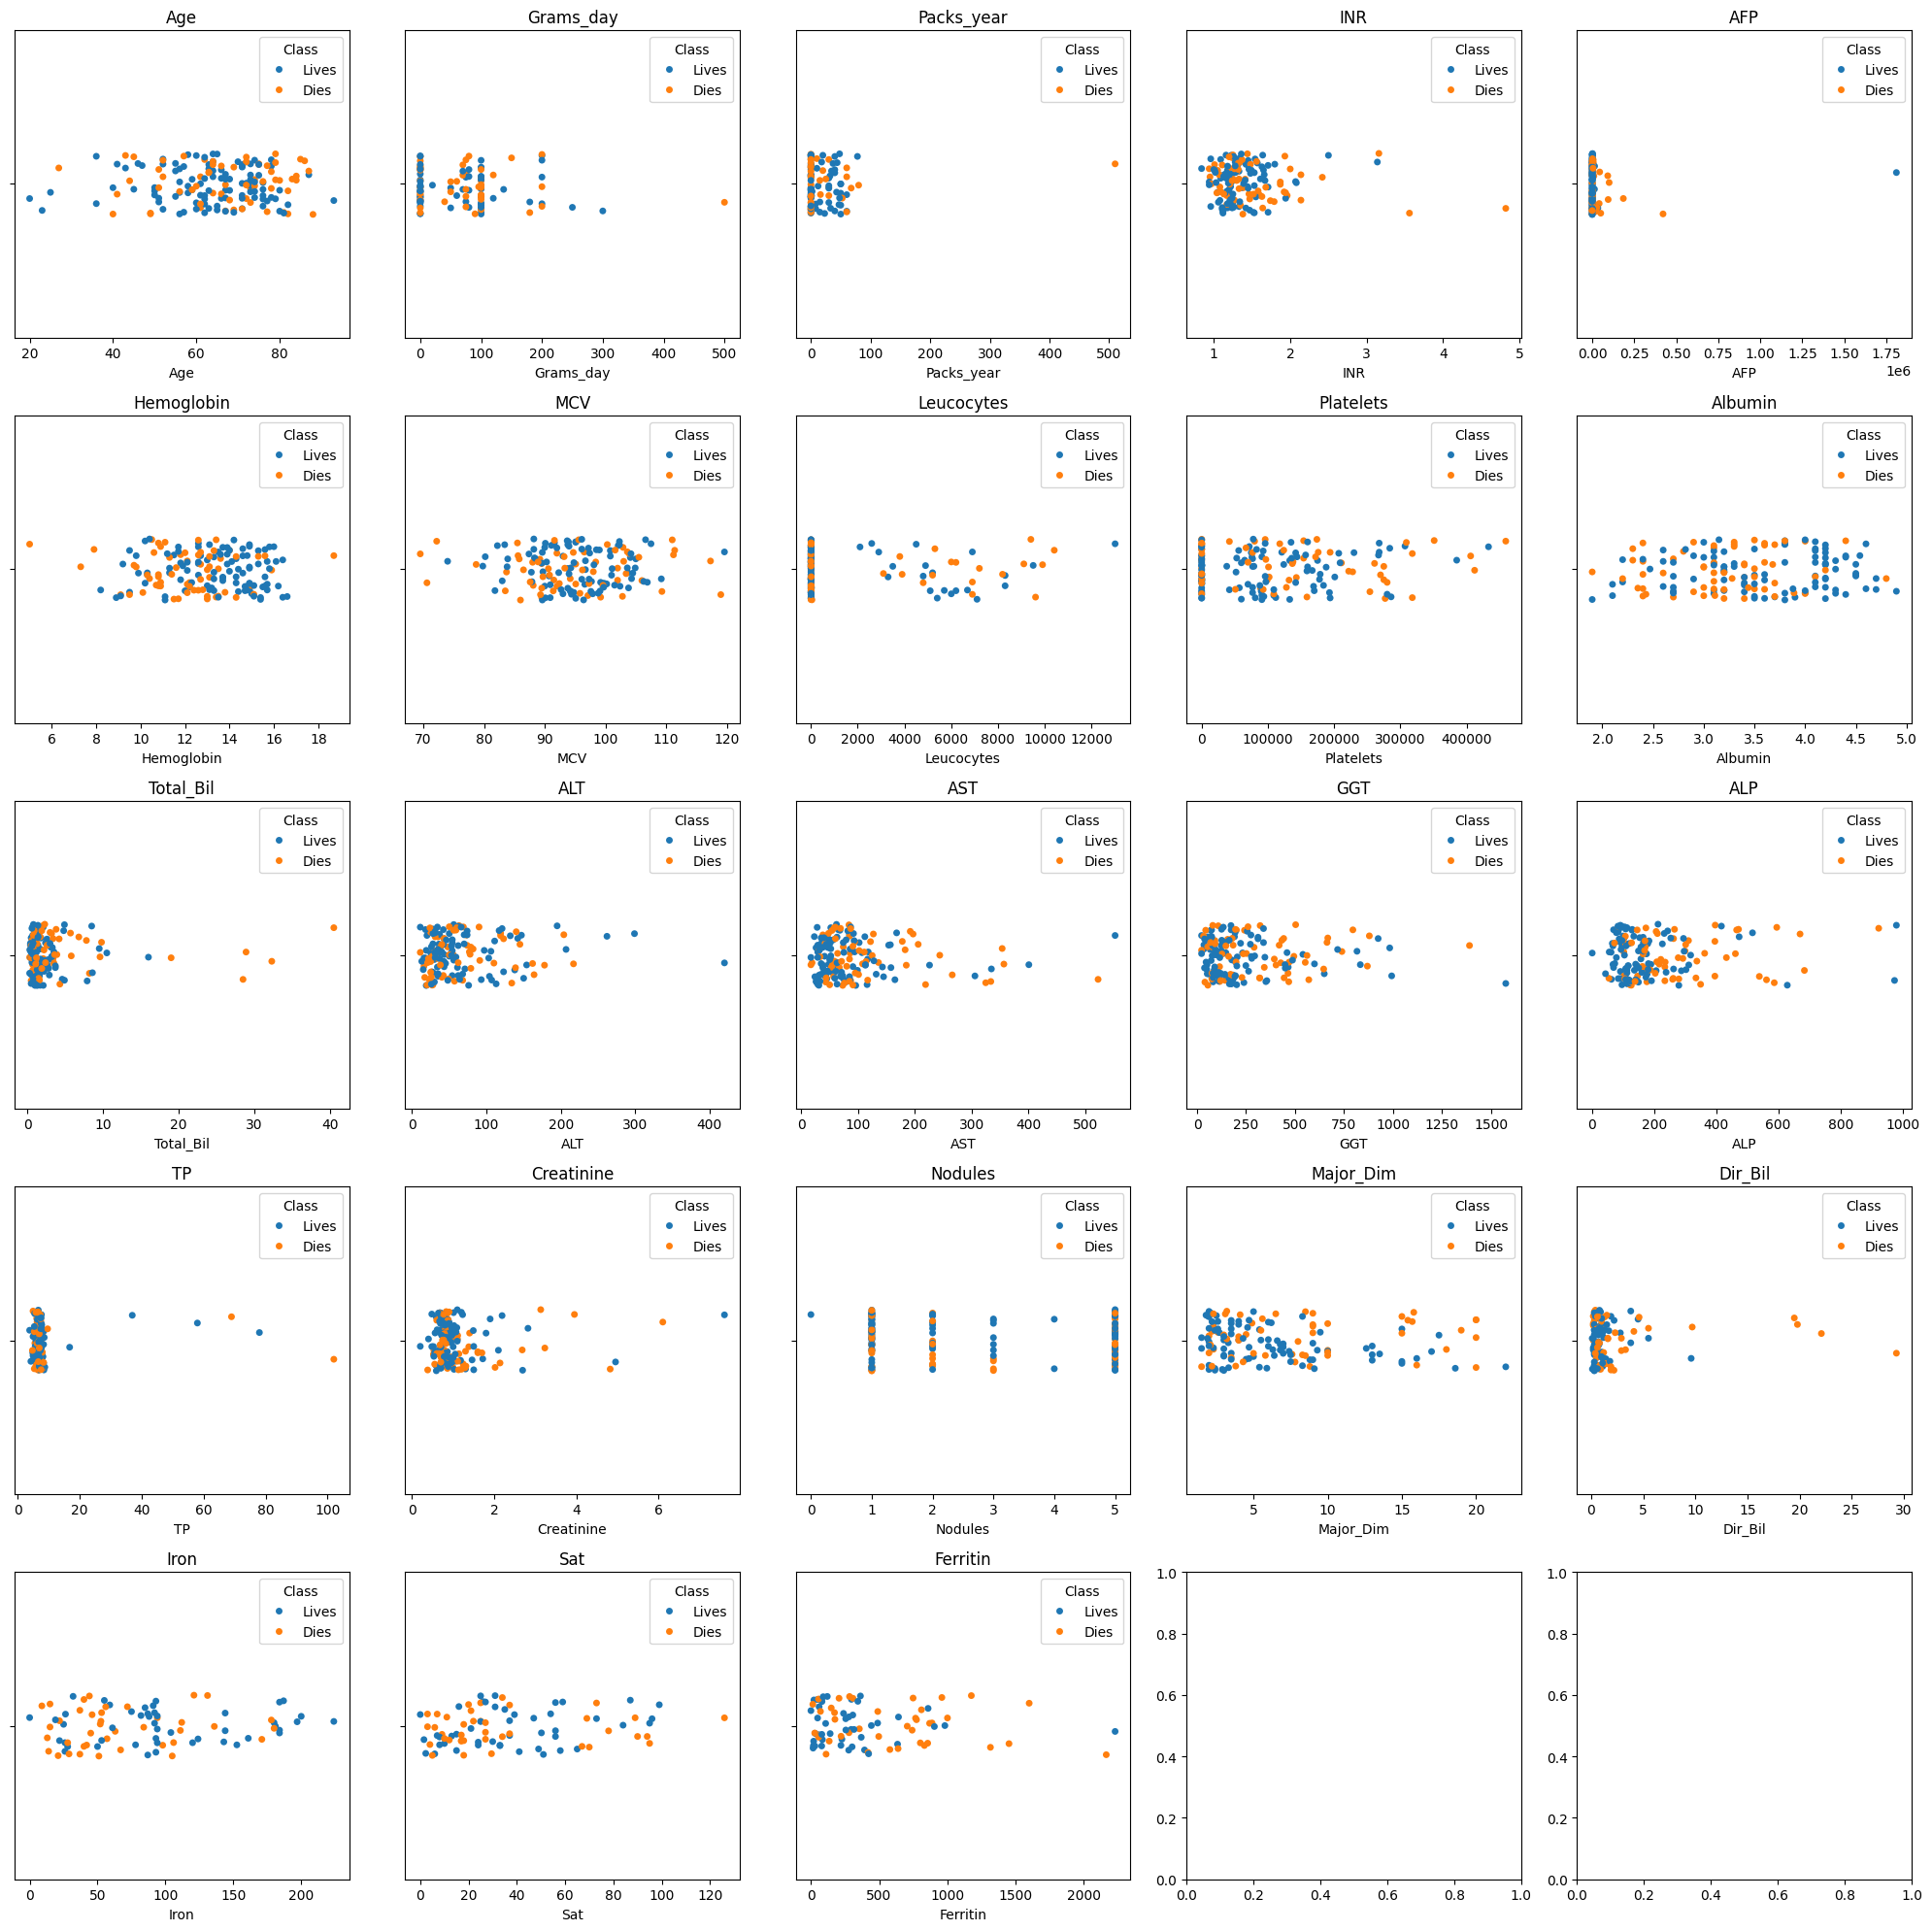

In [67]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

for idx, column in enumerate(hccdf_numerical_cols.columns):
    sb.stripplot(x = column, hue="Class", data = hccdf,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

From this figure we can already spot a few features that may have some outliers (data points that go far outside the average value of a group of statistics) such as "TP" and "Dir_Bil", while others may have such as **"Platelets"** may have had data imputed by different users since if we take a closer look theres a large cluster of dots in the range **[0,1000]** while other dots are in the thousands.

With a quick search, we learn that the normal number of platelets in the blood is **150,000** to **400,000** platelets per microliter of blood, which leads us to conclude that maybe those numbers ranging from 0 to 1000 were typed that way in order to minimize time wasted and are meant to have three zeros added to the right.

We the numerical data already plot, now we'll have a look into the object data type features by generating countplots.

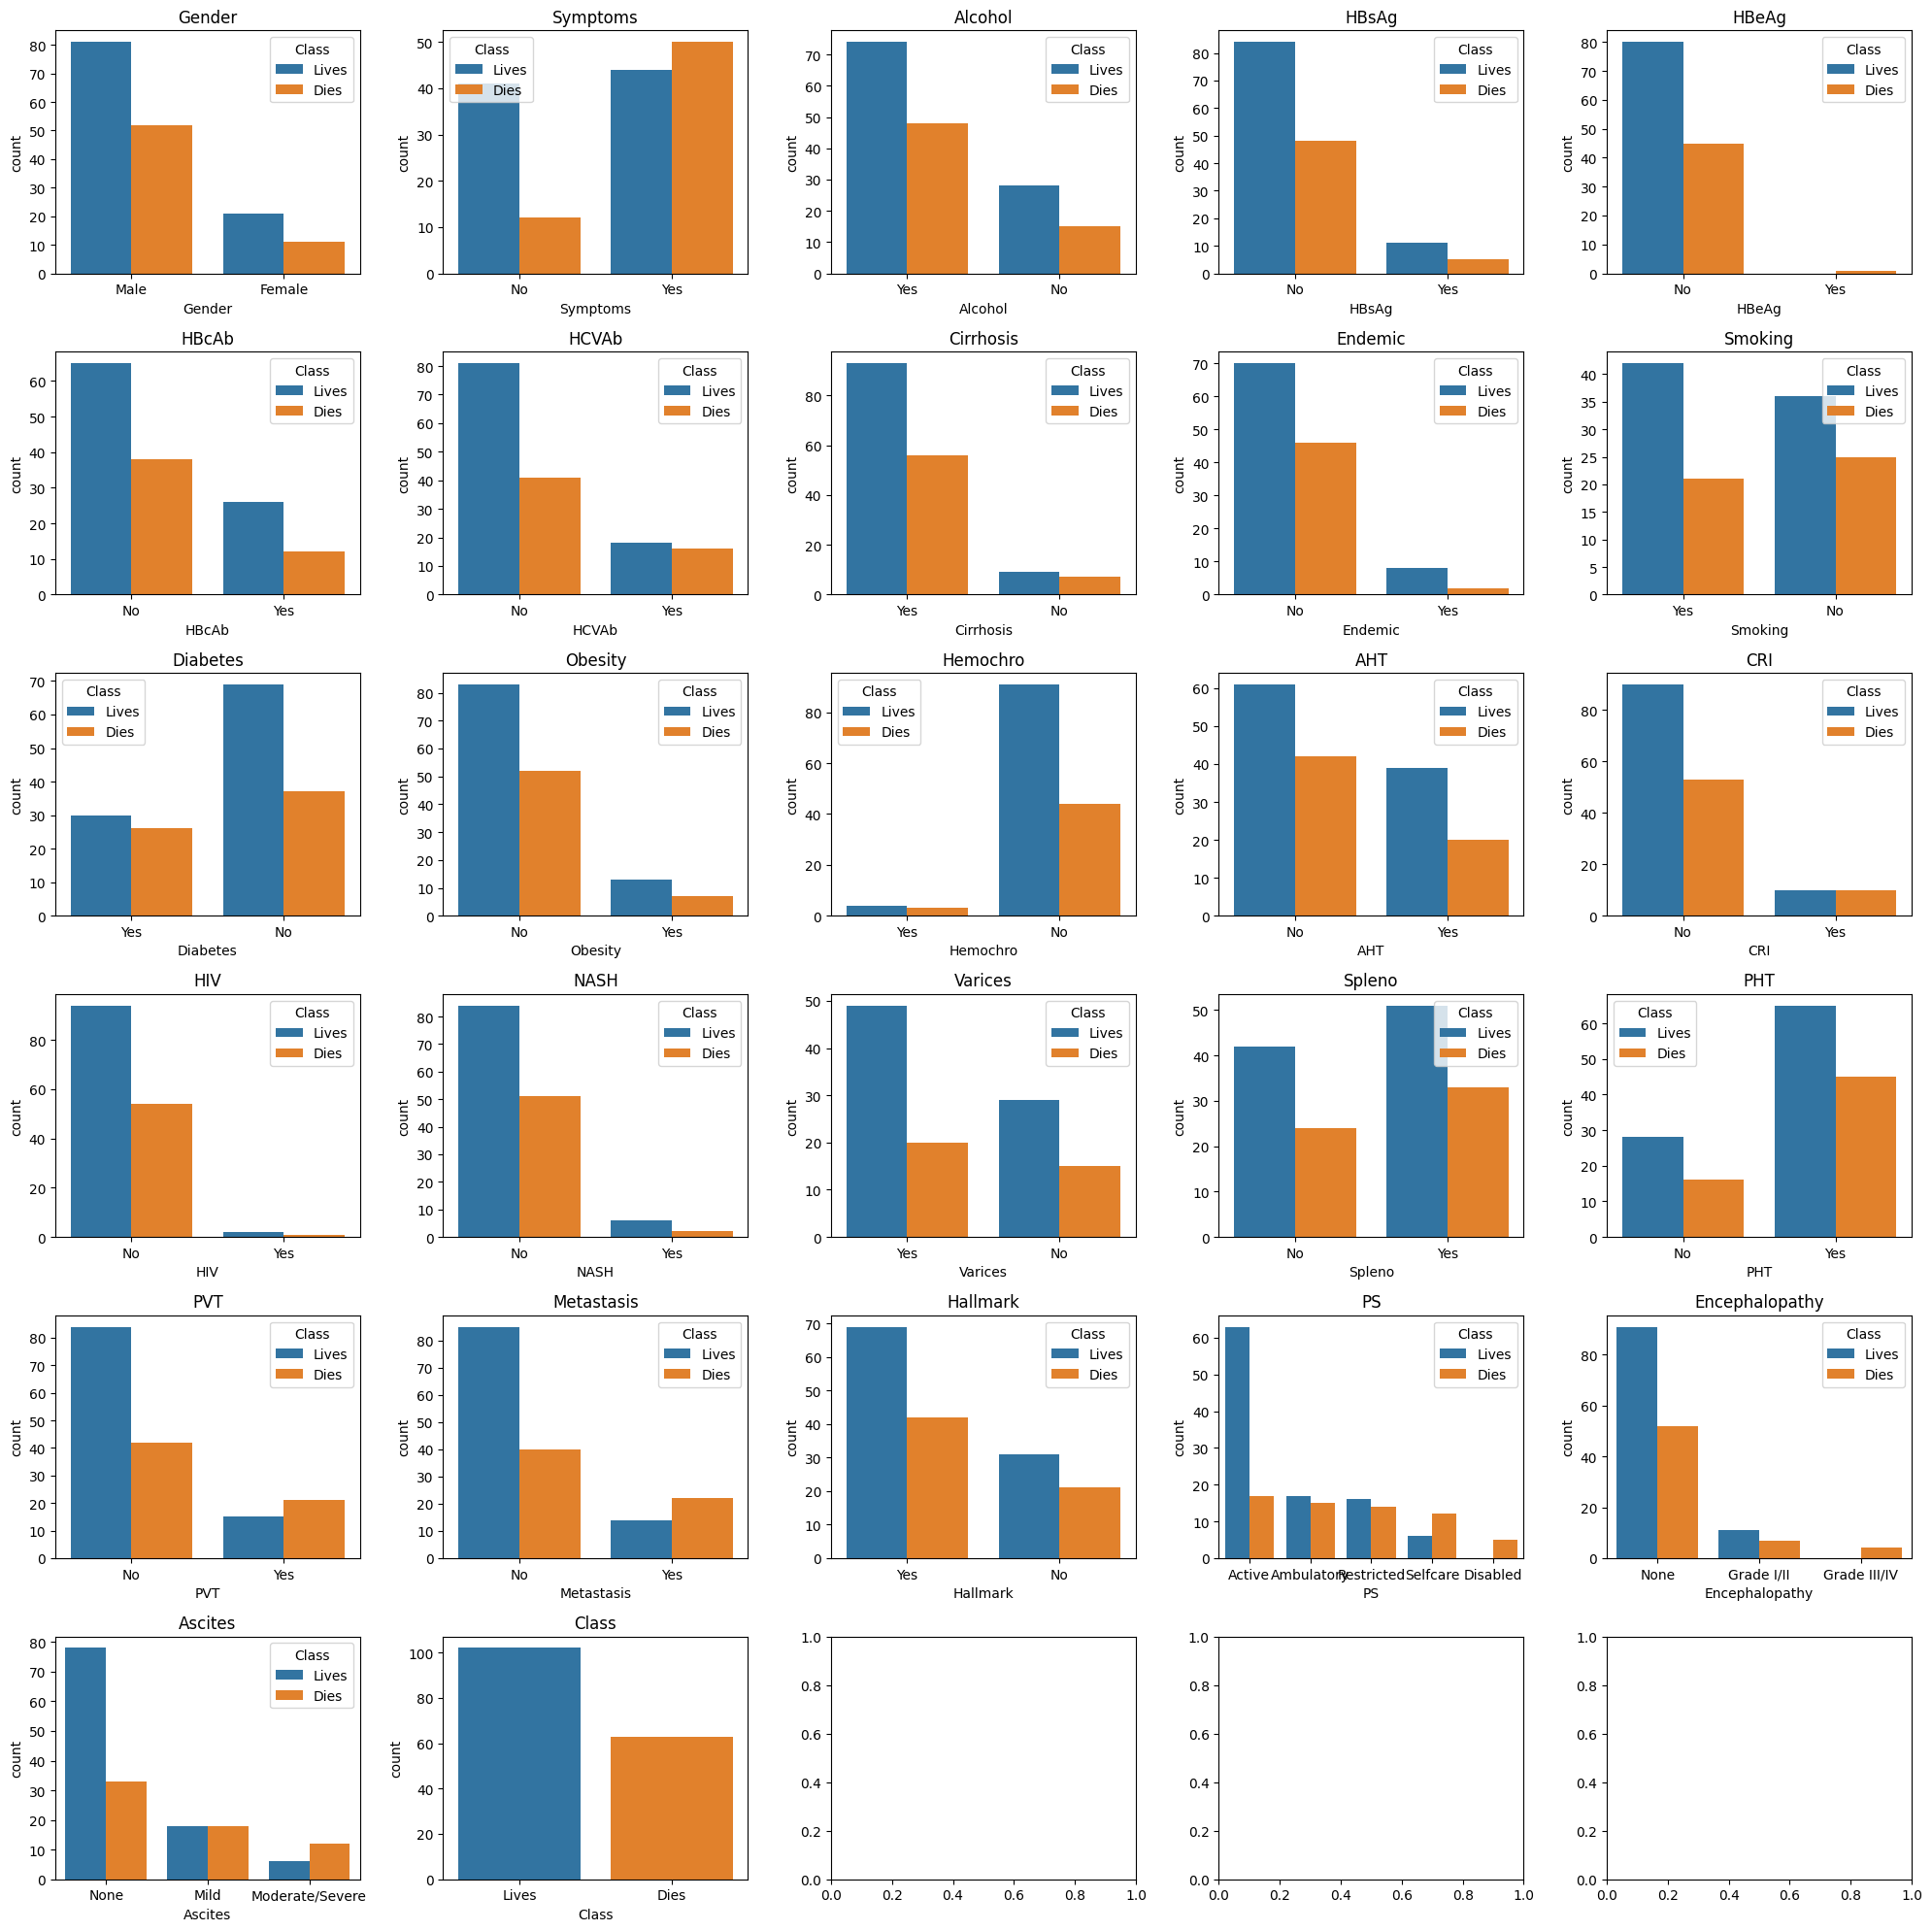

In [68]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

for idx, column in enumerate(hccdf_object_cols.columns):
    sb.countplot(data=hccdf, x=column, hue="Class", ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Unlike the numerical features, we can't perceive the outliers in the object features, if there are any, but it is still fairly easy to observe that some features such as ["HIV","Hemochro","HBeAg"] don't seem to be that relevant since the values (yes or no) inside this features are so umbalanced that they can easily be removed without compromising the accuracy of our machine learning algorithm.

"Other features such as ["Alcohol","Gender","HBcAb"] can be considered irrelevant since the rectangular distributions are similar across the categories of each feature. This indicates that there is little to no correlation between these features and the survivability of the patient ('Class')."

---

## Underlying problem

[[ go back to the top ]](#Table-of-contents)

Through the creation of this countplots we can already spot a problem that will make it difficult to make conclusions about the data and may even lead to a bad performance by the machine learning algorithms we'll be using a few steps from now. We are dealing with **imbalanced data** on the "Class" side which means that from the two groups of people that define the "Class" feature, one is larger than the other, that one being the people who live (**60%** of the 165 cases):

* **Prediction Bias**: Machine learning models trained on imbalanced data tend to be biased towards the majority class, resulting in poor performance on the minority class.
* **Misleading Accuracy**: Accuracy can be misleadingly high if the model predominantly predicts the majority class. For example, if 95% of the data belongs to one class, a model that always predicts this class would have 95% accuracy but would perform poorly on the minority class.
* **Validation**: Standard cross-validation techniques might not work well, as random splits might not preserve the class distribution. Stratified sampling techniques are needed to maintain the class proportions in each fold.

Althought a perfect solution may not be achievable, there are still some ways of overcoming this obstacle:
* **Use Appropriate Metrics**: Focus on metrics like precision, recall, F1-score, and ROC AUC to evaluate model performance.
* **Ensemble Methods**: Use techniques like Random Forest, Gradient Boosting, or Balanced Random Forest that can handle imbalances better.
* **Stratified Cross-Validation**: Ensure each fold of the cross-validation preserves the class distribution.

Outside of the imbalanced data, as we're going to visualize in the following lines of code, there are too many missing values, especially when it concerns the top 3 features with highest percentage of missing values: [Sat,Ferritin,Iron].

Top 10 columns with highest percentage of missing values:
Sat           48.484848
Ferritin      48.484848
Iron          47.878788
Packs_year    32.121212
Varices       31.515152
Grams_day     29.090909
Dir_Bil       26.666667
Smoking       24.848485
HBeAg         23.636364
Endemic       23.636364
dtype: float64


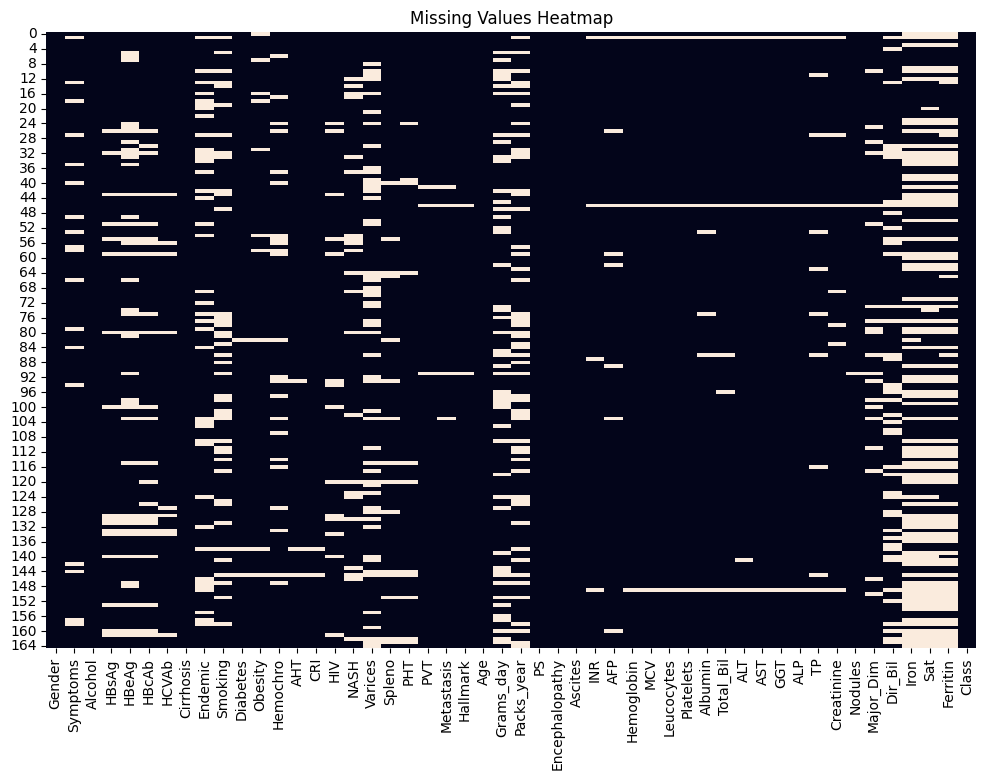

In [69]:
# Calculate percentage of missing values
missing_percentage = hccdf.isnull().mean() * 100
# Print the 10 columns with the highest percentage of missing values
print("Top 10 columns with highest percentage of missing values:")
print(f"{missing_percentage.nlargest(10)}")

plt.figure(figsize=(12, 8))
sb.heatmap(hccdf.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

---

## Step 3: Tidying the data

[[ go back to the top ]](#Table-of-contents)

Now that we've identified several errors in the data set, we need to fix them before we proceed with the analysis.

Let's walk through the issues one-by-one.

>Some numerical features have erroneous data within that needs to be adressed individually as they are not outliers in a true sense.

In the case of the values encountered in the Platelets feature, as we mentioned before, the clustering of dots in the range of [0,1000] is most likely due to input by other user so we're going to correct that by multiplying every number under 1000 by $10^3$.

For the Creatinine values, medical researchers say that values higher than 4.0 milligrams per decilitre, indicate severe kidney disfunction or even failure, so for someone diagnosed with HCC, having that amount of creatinine would be deadly. Therefore, as there are half dozen of those values where the patient still lives, we may consider them as wrongly evaluated or inputed to the dataset, as such values are most likely 4.0 -> 0.4, a normal range for creatinine in a human.

Lastly, just like PLatelets, Leucocytes values are usually measured in two ways, but in the data set, many of the values are measured by $cells*10^{9}$/L, so its humanly impossible to have values higher than 1000 $cells*10^{9}$/L, so higher than 1000 should be converted to and considered as 1. Same applies AFP.

In [70]:
# Function to correct "Platelets" values
def correct_platelets(value):
    if value <= 1000:
        return value * 1000
    return value

# Apply such function
hccdf["Platelets"] = hccdf["Platelets"].apply(correct_platelets)

# Function to correct "Creatinine" values
def correct_Creatinine(row):
    if row["Creatinine"] >= 4 and row["Class"] == "Lives":
        return row["Creatinine"] * 0.1
    return row["Creatinine"]

# Apply the function using apply along axis=1 to operate on rows
hccdf["Creatinine"] = hccdf.apply(lambda row: correct_Creatinine(row), axis=1)

# Function to correct "Leucocytes" values
def correct_leucocytes(value):
    if value >= 1000:
        return value * 0.001
    return value

# Apply such function
hccdf["Leucocytes"] = hccdf["Leucocytes"].apply(correct_leucocytes)

# Function to correct "AFP" values
def correct_AFP(value):
    if value >= 200:
        return value * 0.001
    return value

# Apply such function
hccdf["AFP"] = hccdf["AFP"].apply(correct_AFP)

There are a couple of ways to getting rid of outliers. We'll analyze two of them: **Z-Score** and **IQR (Interquartile Range)** outlier detection algorithms.

The **z-score** measures how many standard deviations a data point is from the mean. Data points with a z-score above 3 or below -3 are typically considered outliers.

<img src="images/Z_score.png" />

In [71]:
def detect_outliers_z(df, threshold=3):
    outliers = []
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate Z-score for each value in the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        # Find outliers based on threshold
        column_outliers = df[(z_scores.abs() > threshold)]
        # Add outliers to list
        if not column_outliers.empty:
            for index, value in column_outliers[column].items():
                outliers.append((column, index, value))
    return outliers

# Example usage:
outliers_list_z = detect_outliers_z(hccdf)
print("Outliers detected based on Z-score method:")
for outlier in outliers_list_z:
    print(outlier)

Outliers detected based on Z-score method:
('Age', 29, 20)
('Age', 70, 23)
('Grams_day', 19, 500.0)
('Grams_day', 63, 300.0)
('Packs_year', 128, 510.0)
('INR', 8, 3.14)
('INR', 23, 4.82)
('INR', 56, 3.56)
('INR', 76, 3.16)
('AFP', 71, 1810.346)
('Hemoglobin', 107, 5.0)
('MCV', 107, 69.5)
('Leucocytes', 36, 44.6)
('Leucocytes', 50, 20.9)
('Leucocytes', 99, 24.8)
('Platelets', 2, 472000.0)
('Platelets', 29, 556000.0)
('Platelets', 78, 561000.0)
('Total_Bil', 101, 28.9)
('Total_Bil', 103, 40.5)
('Total_Bil', 111, 32.3)
('Total_Bil', 164, 28.5)
('ALT', 41, 299.0)
('ALT', 99, 262.0)
('ALT', 106, 420.0)
('AST', 41, 553.0)
('AST', 54, 523.0)
('AST', 144, 401.0)
('GGT', 71, 1575.0)
('GGT', 73, 1390.0)
('ALP', 29, 974.0)
('ALP', 55, 923.0)
('ALP', 120, 980.0)
('TP', 22, 69.0)
('TP', 31, 58.0)
('TP', 104, 78.0)
('TP', 141, 102.0)
('Creatinine', 103, 4.82)
('Creatinine', 132, 6.1)
('Creatinine', 164, 3.95)
('Dir_Bil', 101, 19.5)
('Dir_Bil', 103, 29.3)
('Dir_Bil', 111, 22.1)
('Dir_Bil', 164, 19.8)

On the other hand, the **IQR** is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Outliers are typically defined as observations that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

<img src="images/IQR.png" style="width:540px" />

In [72]:
def detect_outliers_iqr(df, threshold=1.5):
    outliers = []
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate IQR for the column
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        # Find outliers based on threshold
        column_outliers = df[((df[column] < q1 - threshold * iqr) | (df[column] > q3 + threshold * iqr))]
        # Add outliers to list
        if not column_outliers.empty:
            for index, value in column_outliers[column].items():
                outliers.append((column, index, value))
    return outliers

# Example usage:
outliers_list_iqr = detect_outliers_iqr(hccdf)
print("Outliers detected based on IQR method:")
for outlier in outliers_list_iqr:
    print(outlier)

Outliers detected based on IQR method:
('Age', 29, 20)
('Age', 50, 27)
('Age', 70, 23)
('Age', 149, 25)
('Grams_day', 19, 500.0)
('Grams_day', 63, 300.0)
('Packs_year', 18, 78.0)
('Packs_year', 48, 80.0)
('Packs_year', 128, 510.0)
('INR', 8, 3.14)
('INR', 16, 2.14)
('INR', 23, 4.82)
('INR', 56, 3.56)
('INR', 76, 3.16)
('INR', 79, 2.08)
('INR', 117, 2.42)
('INR', 131, 2.5)
('INR', 163, 2.14)
('AFP', 0, 95.0)
('AFP', 5, 110.0)
('AFP', 6, 138.9)
('AFP', 10, 100.809)
('AFP', 11, 86.0)
('AFP', 23, 185.0)
('AFP', 42, 185.203)
('AFP', 48, 163.0)
('AFP', 55, 77.0)
('AFP', 71, 1810.346)
('AFP', 90, 123.0)
('AFP', 108, 173.0)
('AFP', 110, 114.0)
('AFP', 111, 173.0)
('AFP', 125, 421.5)
('AFP', 127, 77.0)
('AFP', 132, 152.0)
('AFP', 140, 180.0)
('AFP', 146, 92.421)
('AFP', 162, 75.0)
('AFP', 163, 94.964)
('Hemoglobin', 107, 5.0)
('MCV', 75, 119.0)
('MCV', 88, 70.6)
('MCV', 107, 69.5)
('MCV', 131, 119.6)
('MCV', 146, 72.2)
('MCV', 163, 117.3)
('Leucocytes', 36, 44.6)
('Leucocytes', 41, 15.4)
('Leuc

Since IQR yielded more desirable results in comparison to Z-score, we'll be using it to detect and replace the outliers by the maximum normal value if it is an absurdly high outlier or minimum if it is a low one. This way they won't be nuisance or influence in a negative way the performance of our classification algorithm.

In [73]:
def detect_and_replace_outliers_iqr(df, threshold=2.0):
    outliers_replaced = 0
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        if column in ["Age", "Grams_day","AFP","Total_Bil","ALP","Creatinine","Platelets","Leucocytes"]: #outliers already analysed
            continue  # Skip outlier detection for these columns
        # Calculate quartiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        # Calculate the upper and lower bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        # Detect outliers
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        # Replace outliers with max or min value of the normal range
        if outliers_mask.any():
            high_outliers_mask = df[column] > upper_bound
            low_outliers_mask = df[column] < lower_bound
            if high_outliers_mask.any():
                new_value = upper_bound
                old_values = df.loc[high_outliers_mask, column]
                df.loc[high_outliers_mask, column] = new_value
                outliers_replaced += high_outliers_mask.sum()
                # Output each outlier that is altered
                for patient, old_value in zip(df.index[high_outliers_mask], old_values):
                    print(f"Column '{column}' Patient '{patient}': Old value = {old_value}, New value = {new_value}")
            if low_outliers_mask.any():
                new_value = lower_bound
                old_values = df.loc[low_outliers_mask, column]
                df.loc[low_outliers_mask, column] = new_value
                outliers_replaced += low_outliers_mask.sum()
                # Output each outlier that is altered
                for patient, old_value in zip(df.index[low_outliers_mask], old_values):
                    print(f"Column '{column}' Patient '{patient}': Old value = {old_value}, New value = {new_value}")
    print(f"Total outliers replaced: {outliers_replaced}")
    return df

# Example usage:
cleaned_data = detect_and_replace_outliers_iqr(hccdf, threshold=2.0)

Column 'Packs_year' Patient '128': Old value = 510.0, New value = 91.5
Column 'INR' Patient '8': Old value = 3.14, New value = 2.25
Column 'INR' Patient '23': Old value = 4.82, New value = 2.25
Column 'INR' Patient '56': Old value = 3.56, New value = 2.25
Column 'INR' Patient '76': Old value = 3.16, New value = 2.25
Column 'INR' Patient '117': Old value = 2.42, New value = 2.25
Column 'INR' Patient '131': Old value = 2.5, New value = 2.25
Column 'Hemoglobin' Patient '107': Old value = 5.0, New value = 5.075000000000003
Column 'ALT' Patient '23': Old value = 217.0, New value = 172.0
Column 'ALT' Patient '26': Old value = 178.0, New value = 172.0
Column 'ALT' Patient '41': Old value = 299.0, New value = 172.0
Column 'ALT' Patient '75': Old value = 204.0, New value = 172.0
Column 'ALT' Patient '99': Old value = 262.0, New value = 172.0
Column 'ALT' Patient '106': Old value = 420.0, New value = 172.0
Column 'ALT' Patient '142': Old value = 207.0, New value = 172.0
Column 'ALT' Patient '144

Let's now see the difference in the graphics of each numeric feature. We should expect now some cleaner and more compact graphics than before.

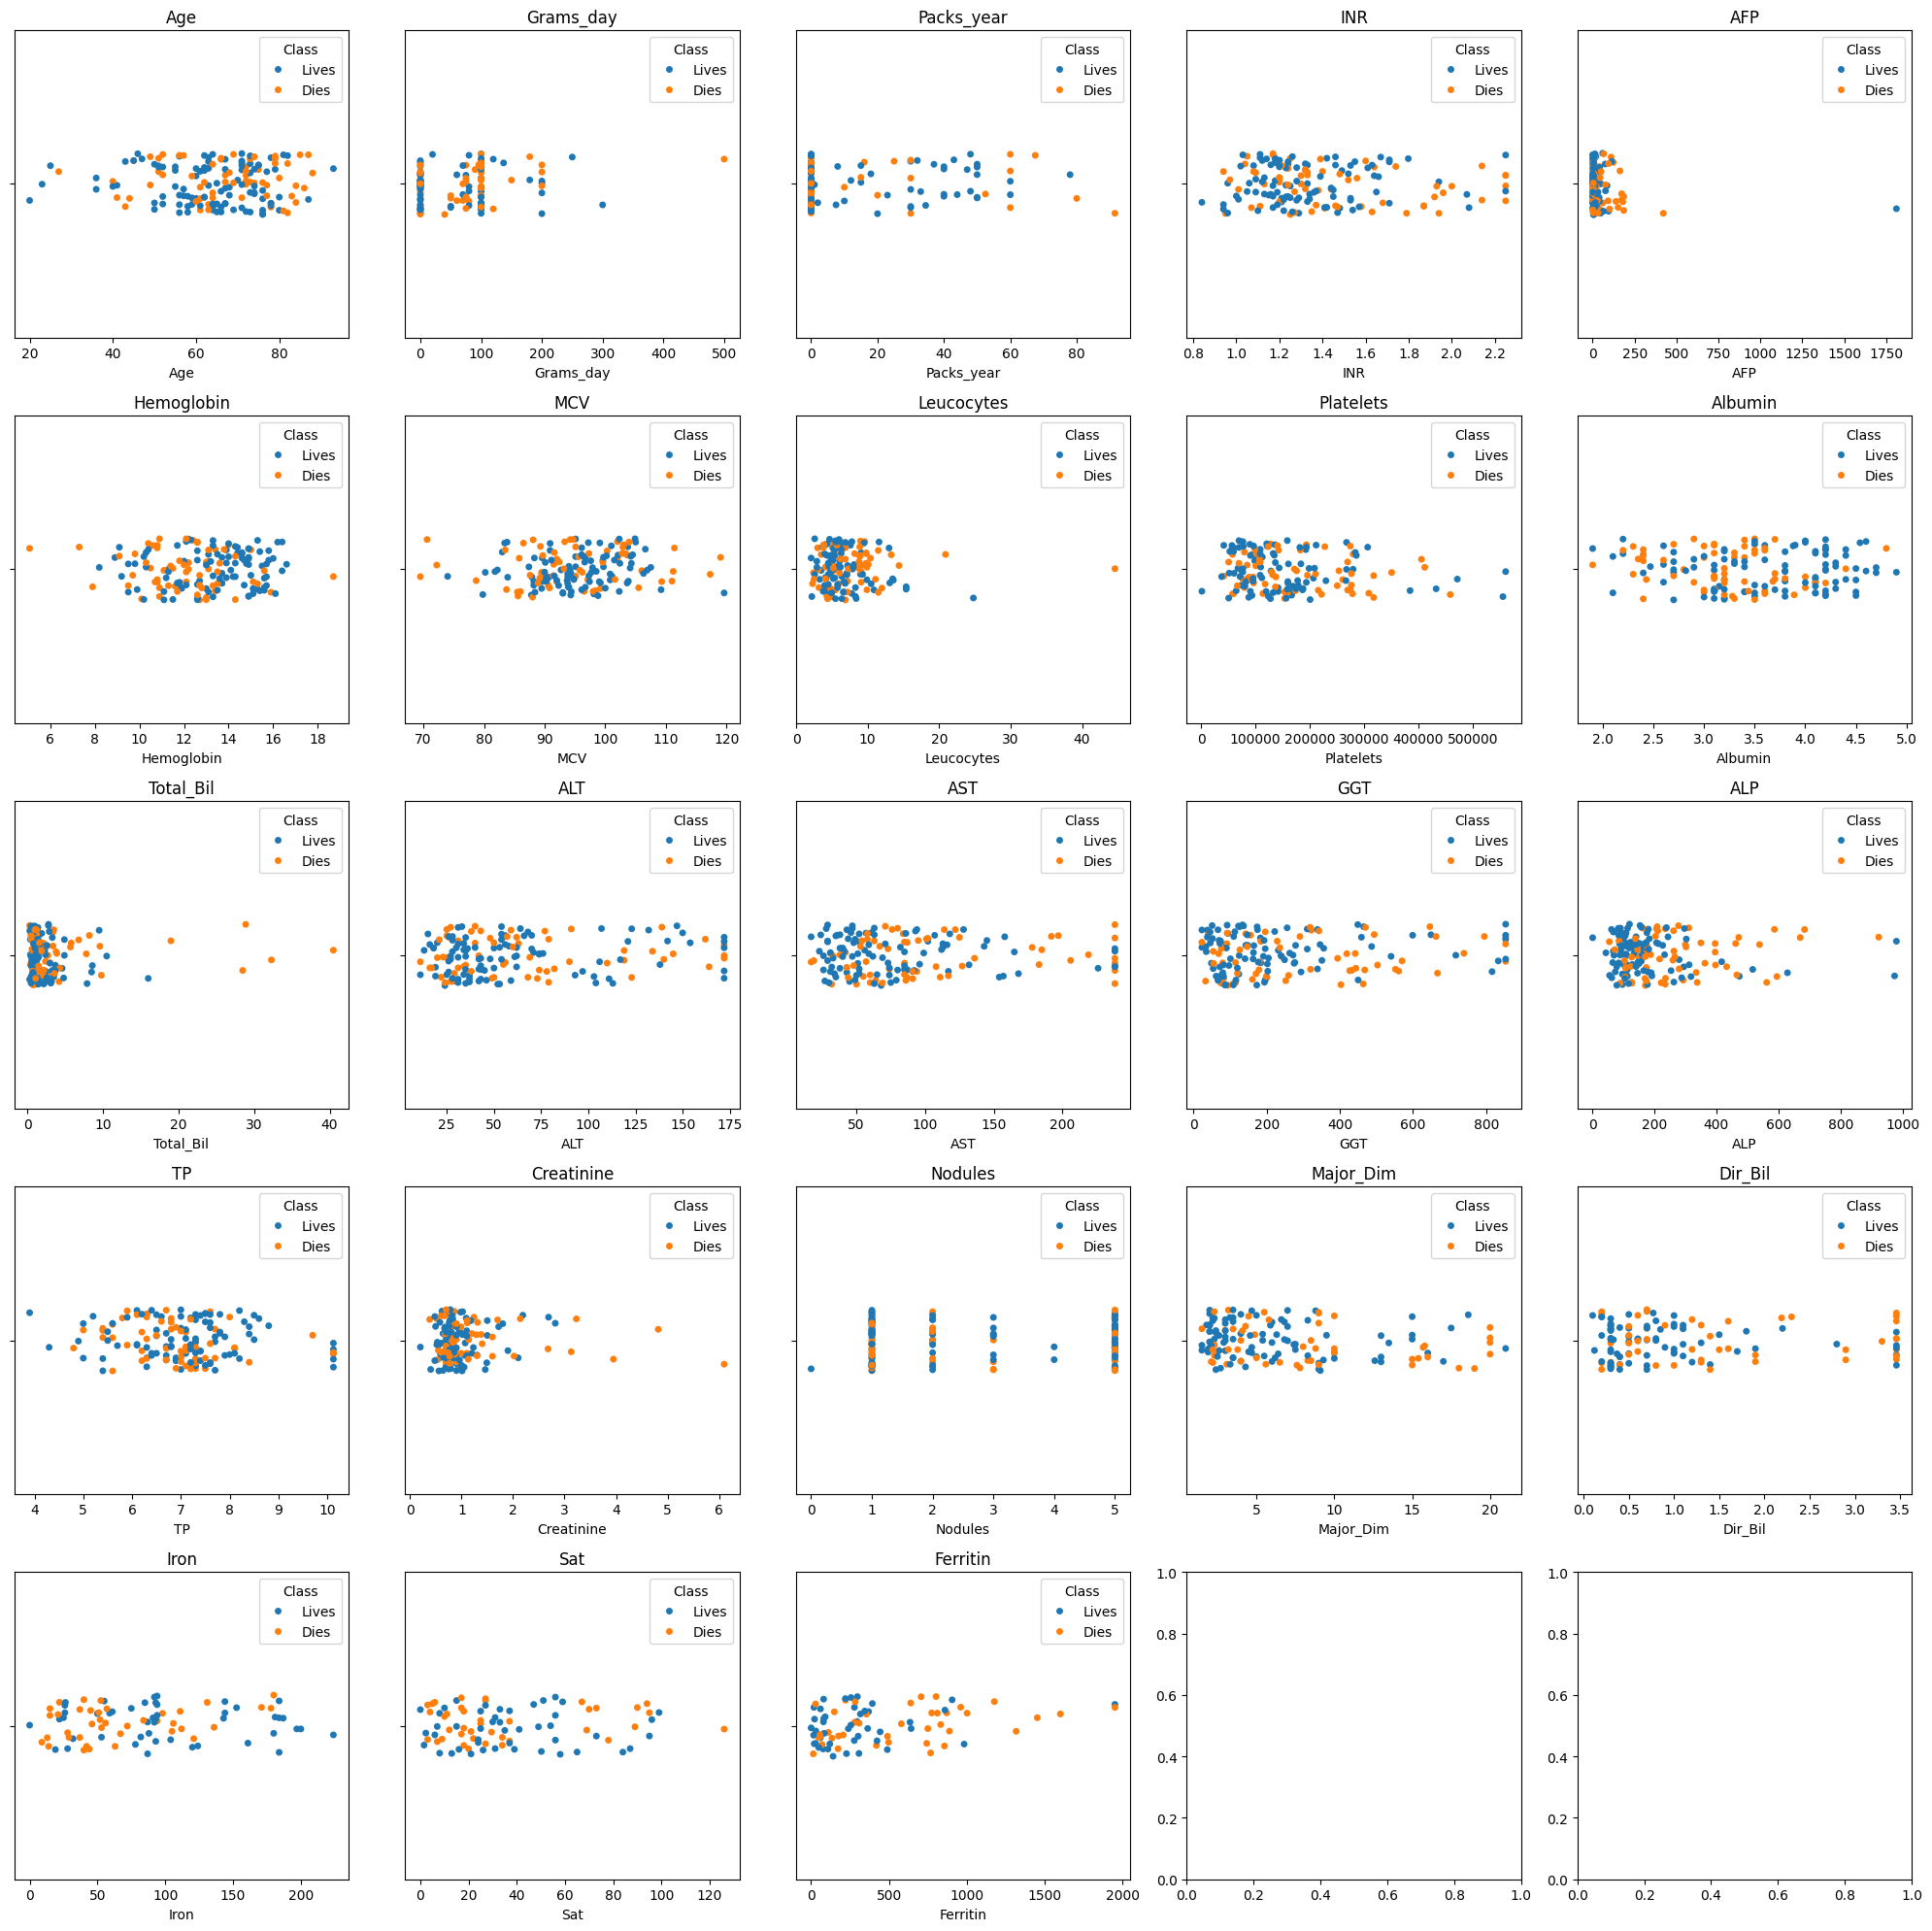

In [74]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

for idx, column in enumerate(hccdf_numerical_cols.columns):
    sb.stripplot(x = column, hue="Class", data = hccdf,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

As you're able to see there are far less outliers lying around now than there were before, so we're gonna stick with these new values.

Given the fact that not much can be done when it comes to replacing some values by others in the object features, the only that's left to create a machine learning model is to get rid of every missing value.

Now when it comes to getting rid of missing values we have two options: eliminating that column/row or replace the missing value with the average value of a certain feature.

As we mentioned before, columns like Iron, Sat and Ferritin have almost 50% of missing data, so the next step before removing them from the dataset should be analyze them individually and see if in fact their information is that important to us.

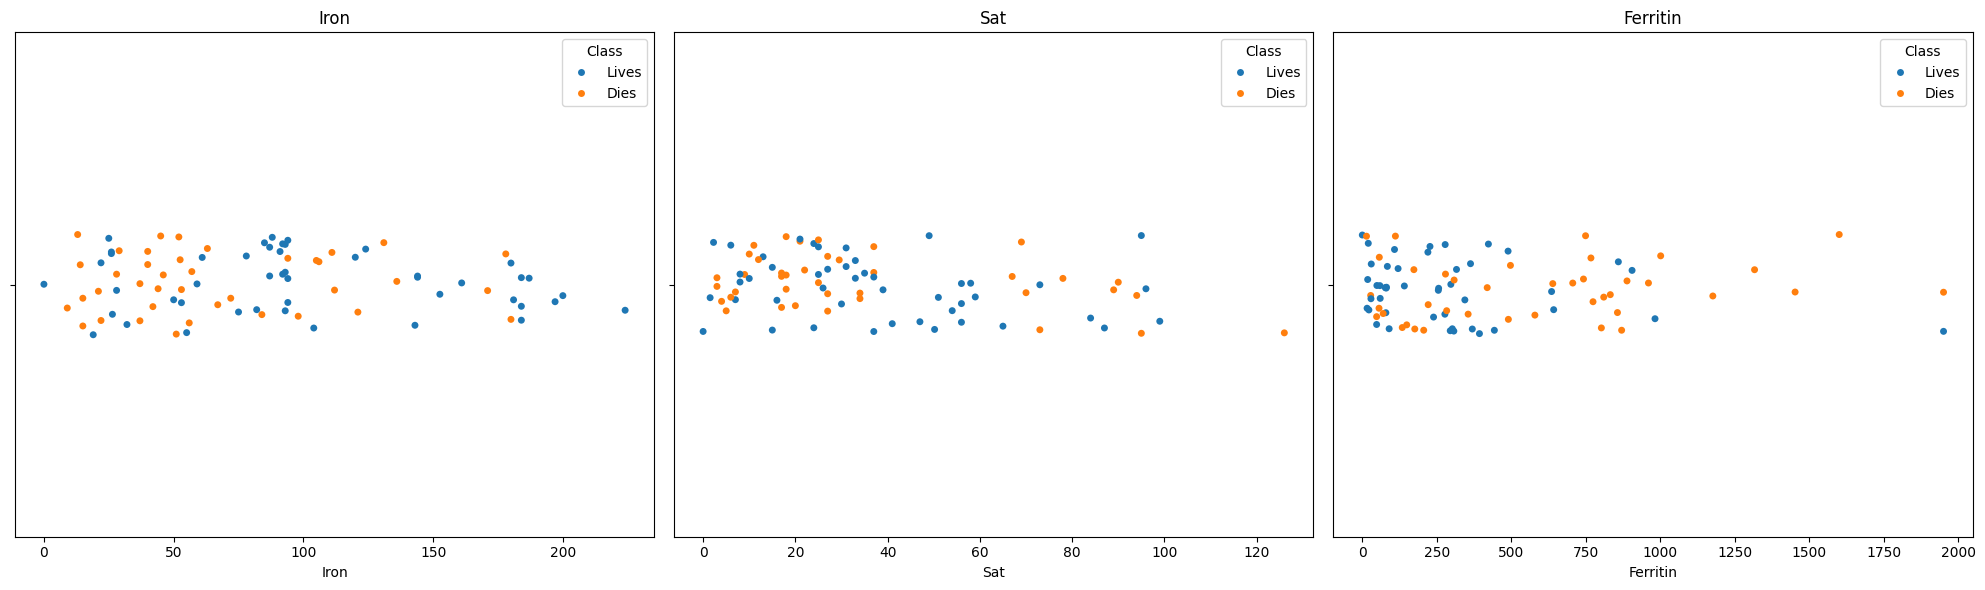

In [75]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot scatter plots for each column
for idx, column in enumerate(["Iron", "Sat", "Ferritin"]):
    sb.stripplot(x=column, hue="Class", data=hccdf, ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("")

# Show the plot
plt.tight_layout()
plt.show()

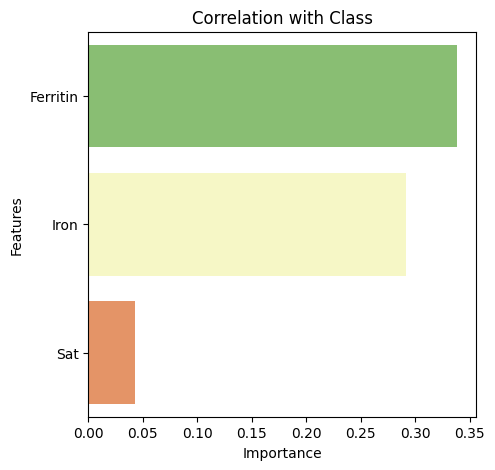

In [76]:
class_numerical = hccdf.copy()
class_numerical.loc[class_numerical["Class"] == "Lives", "Class"] = 1
class_numerical.loc[class_numerical["Class"] == "Dies", "Class"] = 0
class_numerical['Class'] = class_numerical['Class'].astype(int)

class_corr_object_sorted = class_numerical[["Iron", "Sat", "Ferritin", "Class"]].corr()["Class"].drop("Class").abs().sort_values(ascending=False)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
sb.barplot(x=class_corr_object_sorted.values, y=class_corr_object_sorted.index,palette=sb.color_palette("RdYlGn", n_colors=len(class_corr_object_sorted))[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Correlation with Class')
plt.show()

As of now the Sat feature does not look as promessing as the other two, even though they all have about the same percentage of missing data. Futhermore, before taking any action, we should run the last after filling all of the corresponding missing values. 

We do that, in all of the numeric features, by **replacing** all of the data thats **missing** by the **average** value of said feature.

In [77]:
def fill_missing_values(df):
    for column in df.select_dtypes(include=['number']).columns:
        column_avg = df[column].mean()
        if column_avg > 500:
            column_avg = round(column_avg)
        elif column_avg >= 10:
            column_avg = round(column_avg, 1)
        else:
            column_avg = round(column_avg, 3)
        df[column] = df[column].fillna(column_avg)
        print(f"{column} -> {column_avg}")

    for column in df.select_dtypes(include=['number']).columns:
        df[column] = df[column].apply(lambda x: int(x) if float(x).is_integer() else round(x, 1))
        
fill_missing_values(hccdf)

Age -> 64.7
Grams_day -> 71.0
Packs_year -> 16.7
INR -> 1.384
AFP -> 39.3
Hemoglobin -> 12.9
MCV -> 95.1
Leucocytes -> 7.035
Platelets -> 159109
Albumin -> 3.446
Total_Bil -> 3.088
ALT -> 63.3
AST -> 87.9
GGT -> 257.9
ALP -> 212.2
TP -> 7.013
Creatinine -> 1.056
Nodules -> 2.736
Major_Dim -> 6.844
Dir_Bil -> 1.13
Iron -> 85.6
Sat -> 37.0
Ferritin -> 433.2


Let's run the test for Sat, Ferritin and Iron again now.

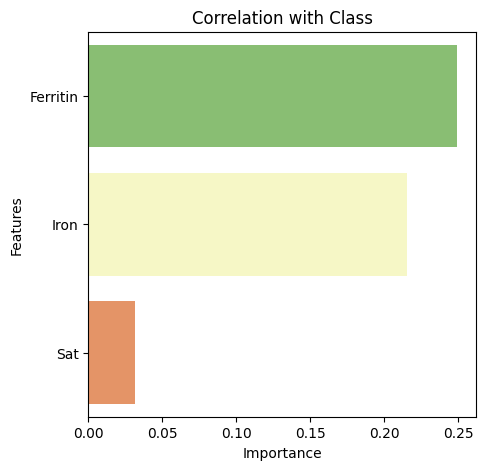

In [78]:
class_numerical = hccdf.copy()
class_numerical.loc[class_numerical["Class"] == "Lives", "Class"] = 1
class_numerical.loc[class_numerical["Class"] == "Dies", "Class"] = 0
class_numerical['Class'] = class_numerical['Class'].astype(int)

class_corr_object_sorted = class_numerical[["Iron", "Sat", "Ferritin", "Class"]].corr()["Class"].drop("Class").abs().sort_values(ascending=False)

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed
sb.barplot(x=class_corr_object_sorted.values, y=class_corr_object_sorted.index,palette=sb.color_palette("RdYlGn", n_colors=len(class_corr_object_sorted))[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Correlation with Class')
plt.show()

As we can see from this simple barplot showing the importance of [Ferritin,Iron,Sat] through correlation with the feature "Class", even after these changes it is perceptible that Sat is not that relevant compared to the other two, se we could just drop it entirely, although instead of doing that we will just regard it as a liability and work on it later. 

**Non Numerical Features**

Unlike the numerical missing values, the objective features should not be changed, due to the great amount of damage they would cause to the results.

In order to put the **Machine Learning** algorithms to work we need to change the missing data from those features to "Unknown", since ML algorithms can not work with them.

In [79]:
def replace_nan_with_unknown(df):
    df.fillna('Unknown', inplace=True)

# Apply the function to your DataFrame
replace_nan_with_unknown(hccdf)

In [80]:
hccdf.to_csv("hcc_dataset_clean.csv", index=False)

## Step 4: Exploratory analysis

[[ go back to the top ]](#Table-of-contents)

Our data set is clean and tidy, it's now time to start analysing it. Digging even deeper into the data set than before.

It's the return of another unending list of colourful charts.

But before any of that, by virtue of the non numeric feautures' missing values from this new data set being read as "NaN" again we need to switch them back to "None" for the sake of the ML algorithms.

In [81]:
hccdf = pd.read_csv('hcc_dataset_clean.csv')
# None values are understood as NaN so we have to turn them back to None
hccdf.loc[hccdf["Encephalopathy"].isnull(),"Encephalopathy"] = "None"
hccdf.loc[hccdf["Ascites"].isnull(),"Ascites"] = "None"

Let's start by representing all the **numeric features** in a scatter kind of plot.

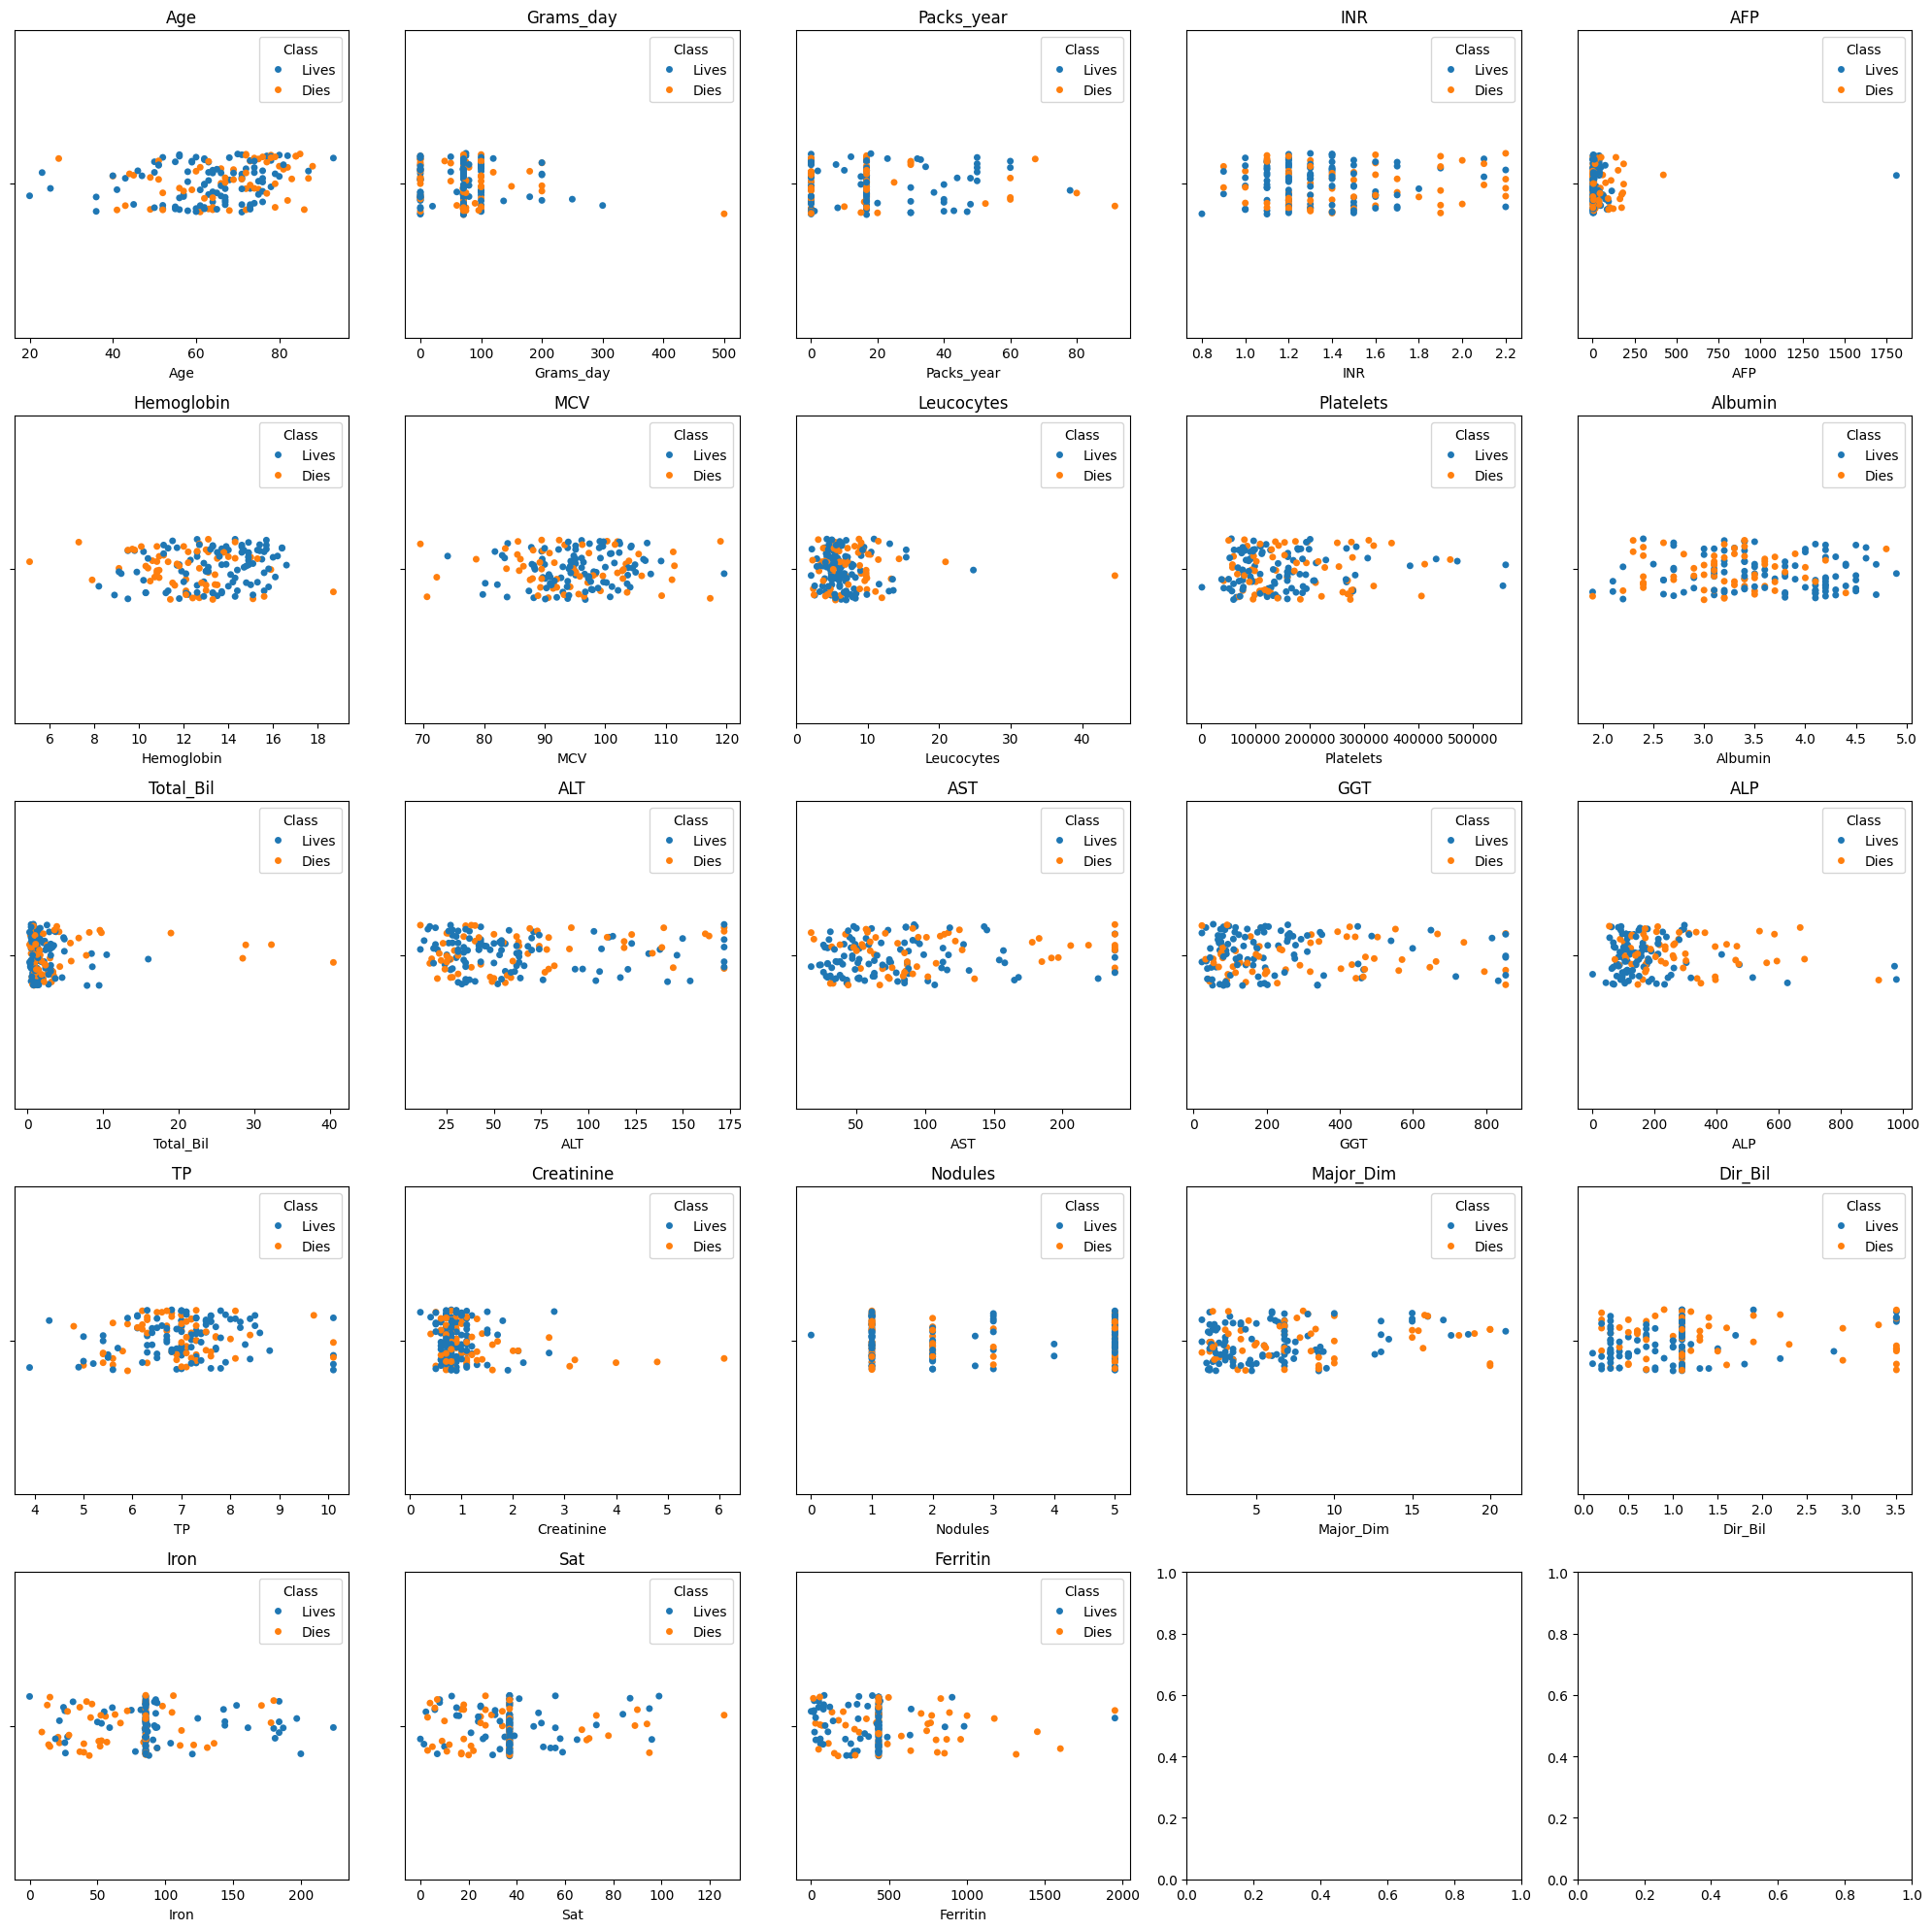

In [82]:
numerical_columns = hccdf.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.stripplot(x = column, hue="Class", data = hccdf,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now its time for the **non numeric features** to shine, in a bar chart.

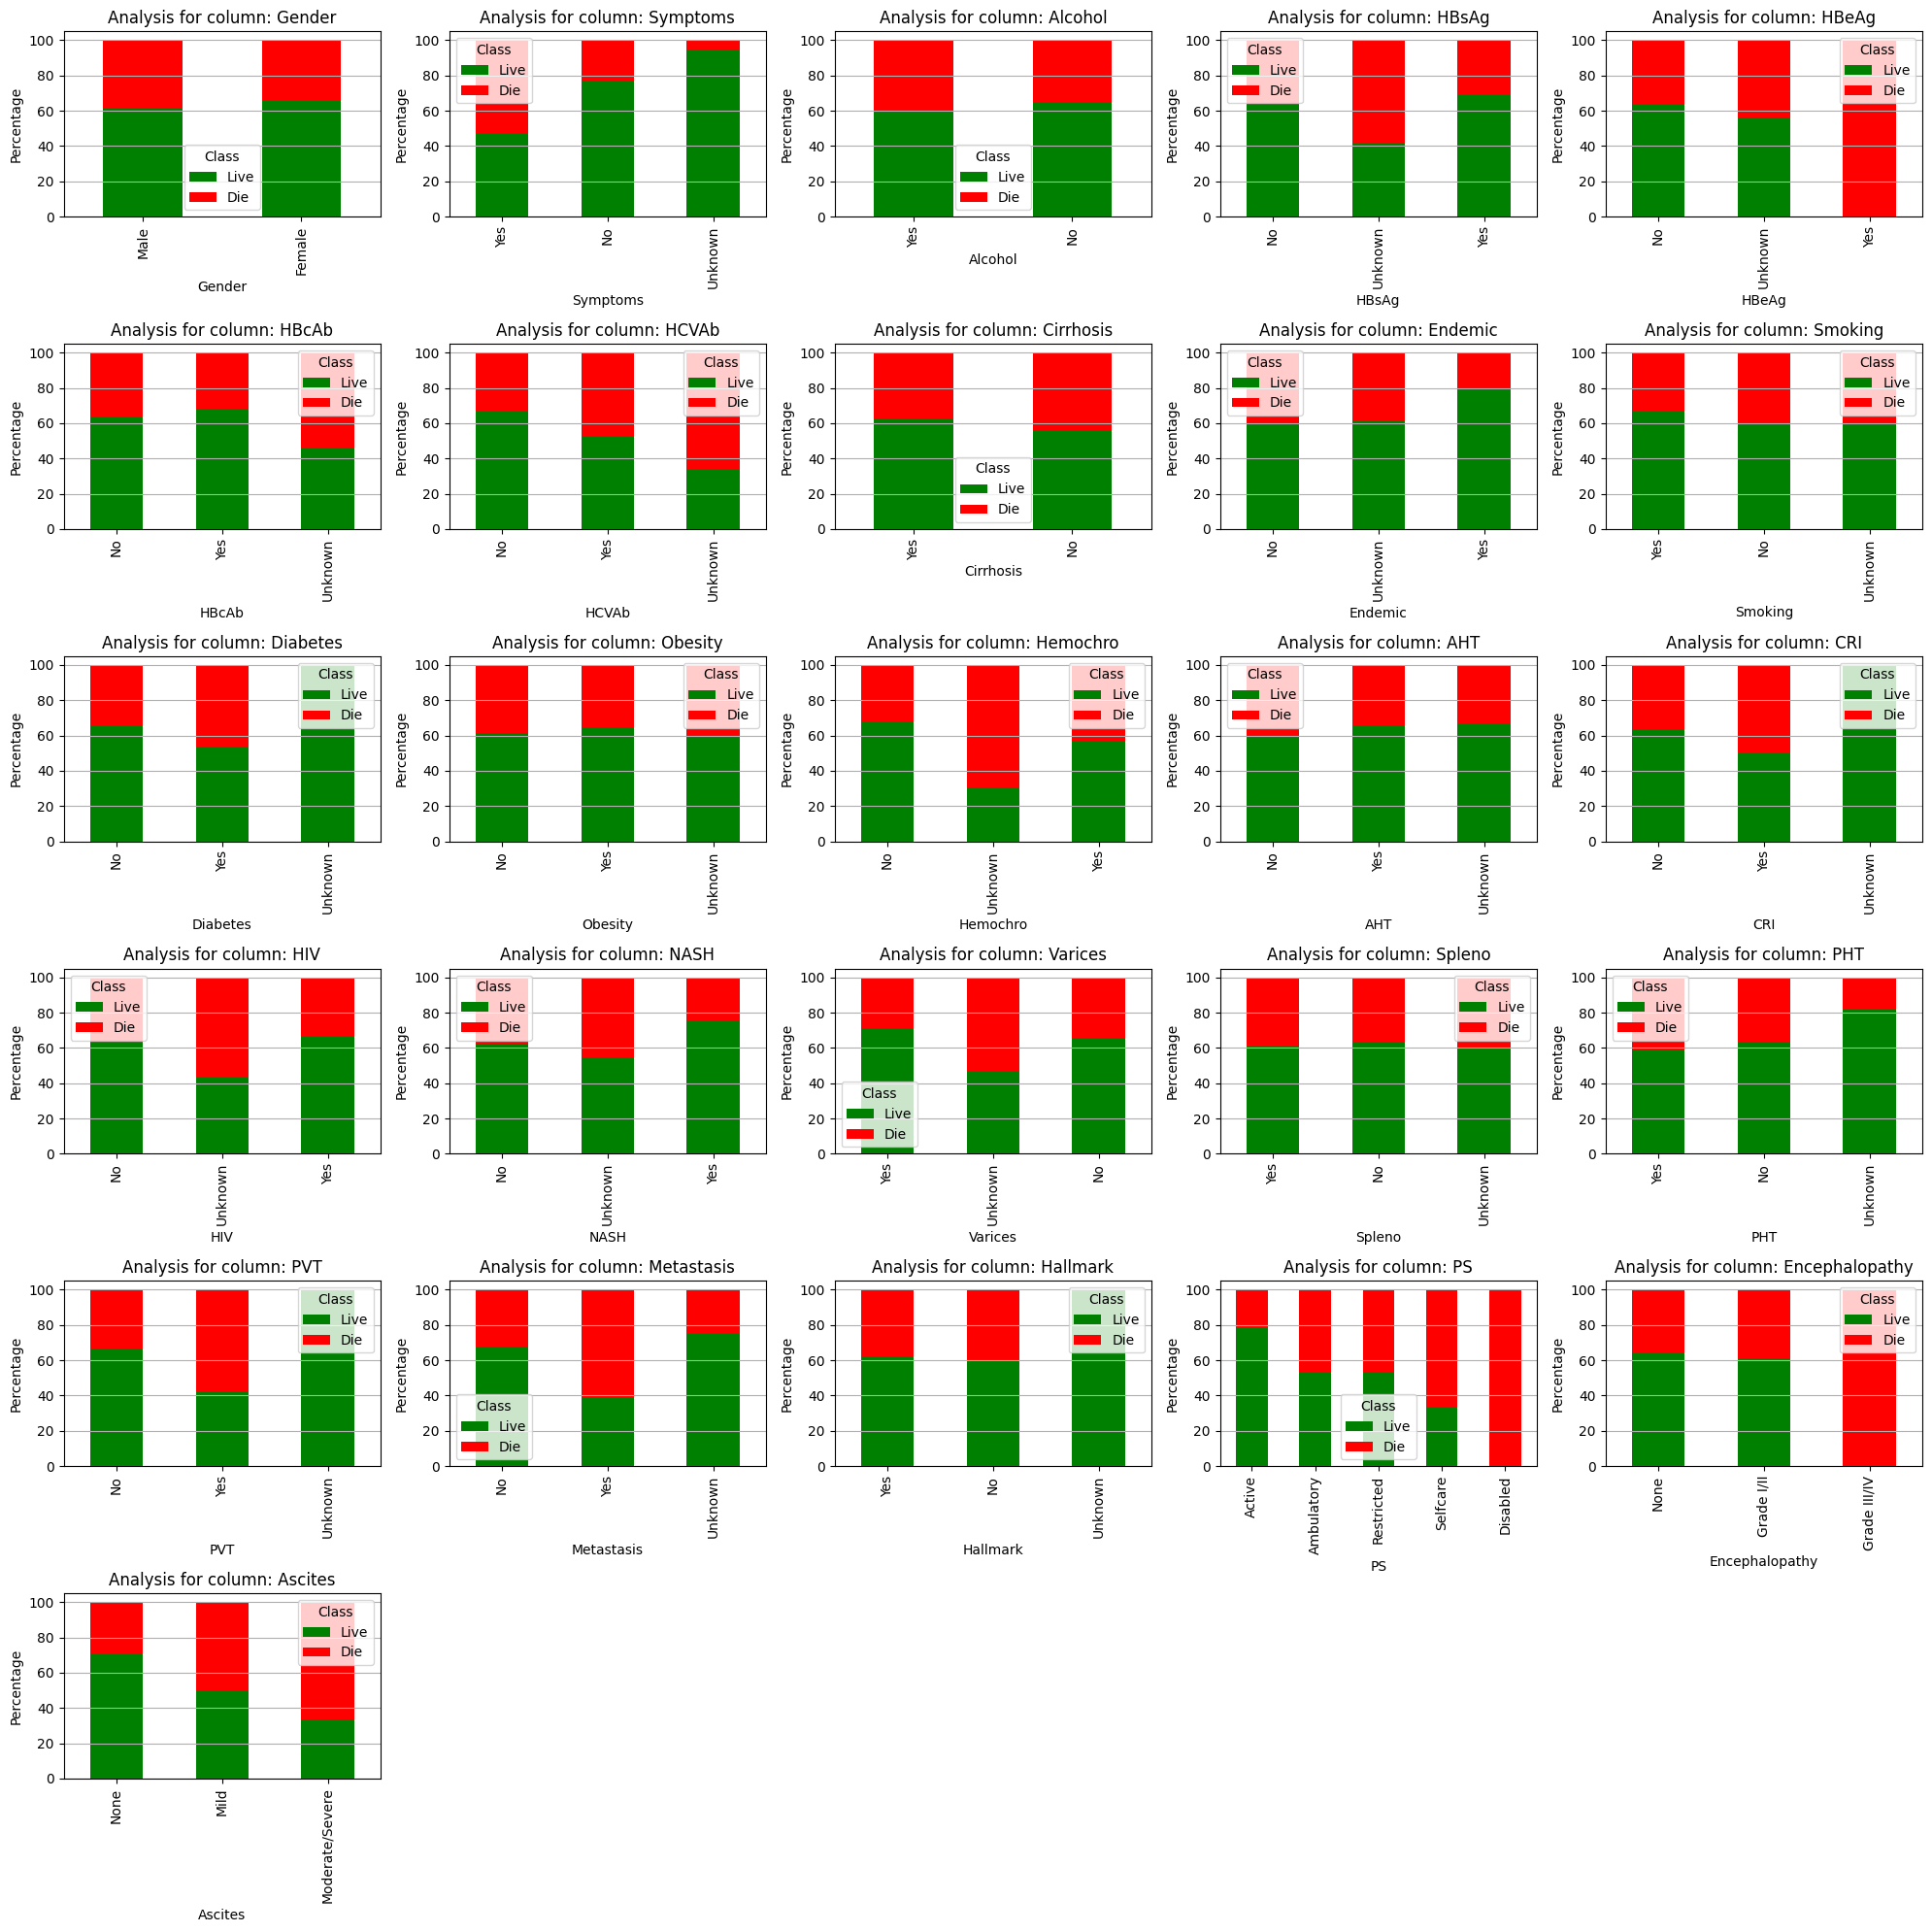

In [83]:
def analyze_non_numeric_columns_visual(df):
    # Filter out non-numeric columns except 'Class'
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns
    non_numeric_columns = [col for col in non_numeric_columns if col != 'Class']
    
    # Define the number of rows and columns for the subplot grid
    n_cols = 5
    n_rows = -(-len(non_numeric_columns) // n_cols)  # Ceiling division to get number of rows
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Iterate over non-numeric columns
    for idx, column in enumerate(non_numeric_columns):
        ax = axes[idx]
        value_counts = df[column].value_counts(dropna=False)
        categories = value_counts.index

        # Initialize lists to hold the data
        live_percentages = []
        die_percentages = []
        labels = []

        for value in categories:
            if pd.notnull(value):  # Skip NaN values
                total_count = value_counts[value]
                live_count = df.loc[df[column] == value, "Class"].value_counts().get("Lives", 0)
                die_count = df.loc[df[column] == value, "Class"].value_counts().get("Dies", 0)
                live_percentage = (live_count / total_count) * 100
                die_percentage = (die_count / total_count) * 100
                live_percentages.append(live_percentage)
                die_percentages.append(die_percentage)
                labels.append(value)

        # Create a DataFrame for the percentages
        percentage_df = pd.DataFrame({
            'Category': labels,
            'Live': live_percentages,
            'Die': die_percentages
        })

        # Plot the data
        percentage_df.set_index('Category').plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])
        ax.set_title(f"Analysis for column: {column}")
        ax.set_ylabel('Percentage')
        ax.set_xlabel(column)
        ax.legend(title='Class')
        ax.grid(axis='y')

    # Hide any unused subplots
    for j in range(len(non_numeric_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
analyze_non_numeric_columns_visual(hccdf)


Now cutting to the chase, we can analyse the importance of each feature in relation to the survivability of the patient.

To do that, we'd have to convert every string value to a numerical value in order to quantitative evaluate each feature and correlate it to the survivability of the patient. 

Before that we'll have a look into what kind of object values we are dealing with for each feature.

In [84]:
hccdf_object_cols = hccdf.select_dtypes(include=['object']).columns
for i in range(len(hccdf_object_cols)):
    print(f"{hccdf_object_cols[i]}: {sorted(hccdf[hccdf_object_cols[i]].unique().tolist())}")

Gender: ['Female', 'Male']
Symptoms: ['No', 'Unknown', 'Yes']
Alcohol: ['No', 'Yes']
HBsAg: ['No', 'Unknown', 'Yes']
HBeAg: ['No', 'Unknown', 'Yes']
HBcAb: ['No', 'Unknown', 'Yes']
HCVAb: ['No', 'Unknown', 'Yes']
Cirrhosis: ['No', 'Yes']
Endemic: ['No', 'Unknown', 'Yes']
Smoking: ['No', 'Unknown', 'Yes']
Diabetes: ['No', 'Unknown', 'Yes']
Obesity: ['No', 'Unknown', 'Yes']
Hemochro: ['No', 'Unknown', 'Yes']
AHT: ['No', 'Unknown', 'Yes']
CRI: ['No', 'Unknown', 'Yes']
HIV: ['No', 'Unknown', 'Yes']
NASH: ['No', 'Unknown', 'Yes']
Varices: ['No', 'Unknown', 'Yes']
Spleno: ['No', 'Unknown', 'Yes']
PHT: ['No', 'Unknown', 'Yes']
PVT: ['No', 'Unknown', 'Yes']
Metastasis: ['No', 'Unknown', 'Yes']
Hallmark: ['No', 'Unknown', 'Yes']
PS: ['Active', 'Ambulatory', 'Disabled', 'Restricted', 'Selfcare']
Encephalopathy: ['Grade I/II', 'Grade III/IV', 'None']
Ascites: ['Mild', 'Moderate/Severe', 'None']
Class: ['Dies', 'Lives']


In [85]:
hccdf_transformed = hccdf.copy()

for col in hccdf.select_dtypes(include=['object']).columns:
    unique_values = sorted(hccdf[col].unique().tolist())
    
    if unique_values == ["Female", "Male"]:
        hccdf_transformed[col].replace({"Male": 1, "Female": -1}, inplace=True)
    elif unique_values == ["No", "Unknown", "Yes"]:
        hccdf_transformed[col].replace({"Yes": 1, "Unknown": 0, "No": -1}, inplace=True)
    elif unique_values == ["No", "Yes"]:
        hccdf_transformed[col].replace({"Yes": 1, "No": -1}, inplace=True)
    elif unique_values == ['Active', 'Ambulatory', 'Disabled', 'Restricted', 'Selfcare']:
        hccdf_transformed[col].replace({"Active": 5, "Ambulatory": 4, "Selfcare": 3, "Restricted": 2, "Disabled": 1}, inplace=True)
    elif unique_values == ['Grade I/II', 'Grade III/IV', 'None']:
        hccdf_transformed[col].replace({"Grade I/II": 1, "Grade III/IV": 2, "None": 0}, inplace=True)
    elif unique_values == ['Mild', 'Moderate/Severe', 'None']:
        hccdf_transformed[col].replace({"Mild": 1, "Moderate/Severe": 2, "None": 0}, inplace=True)
    elif unique_values == ['Dies', 'Lives']:
        hccdf_transformed[col].replace({"Lives": 1, "Dies": -1}, inplace=True)

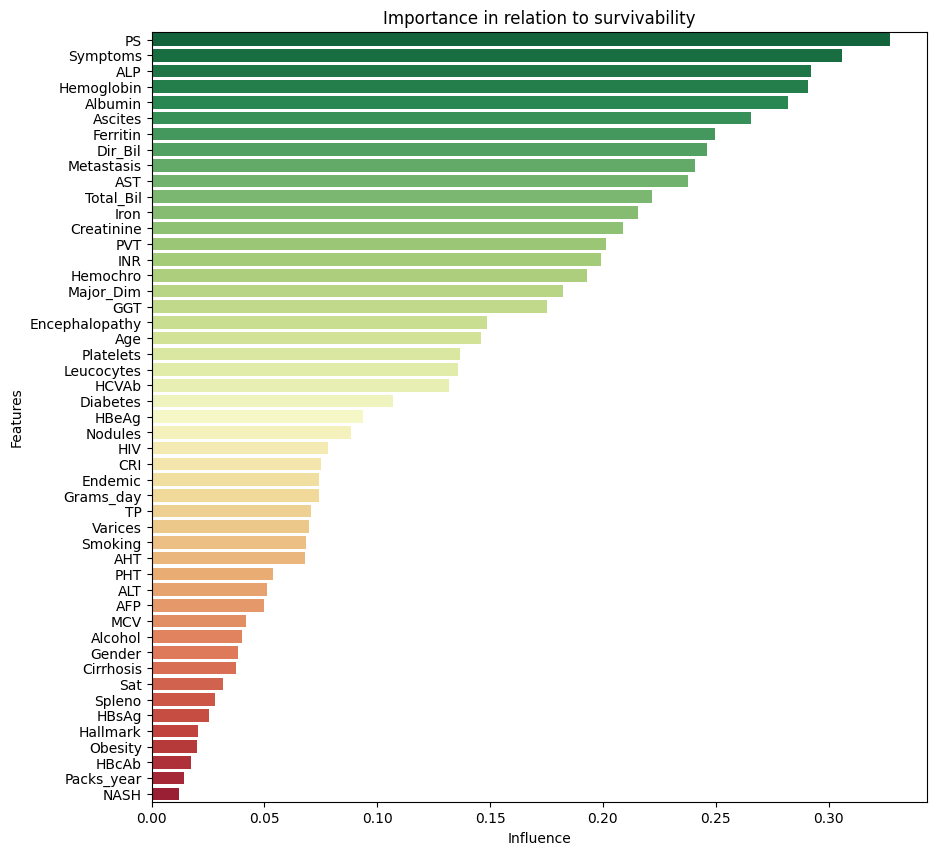

In [86]:
class_corr_object_sorted = hccdf_transformed.corr()["Class"].drop("Class").abs().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sb.barplot(x=class_corr_object_sorted.values, y=class_corr_object_sorted.index,palette=sb.color_palette("RdYlGn", n_colors=len(class_corr_object_sorted))[::-1])
plt.xlabel('Influence')
plt.ylabel('Features')
plt.title('Importance in relation to survivability')
plt.show()

Moving forward we can now see the correlation between survivability and each feature.

Telling us how much does each feature influence the survivability either in a positive or negative way.

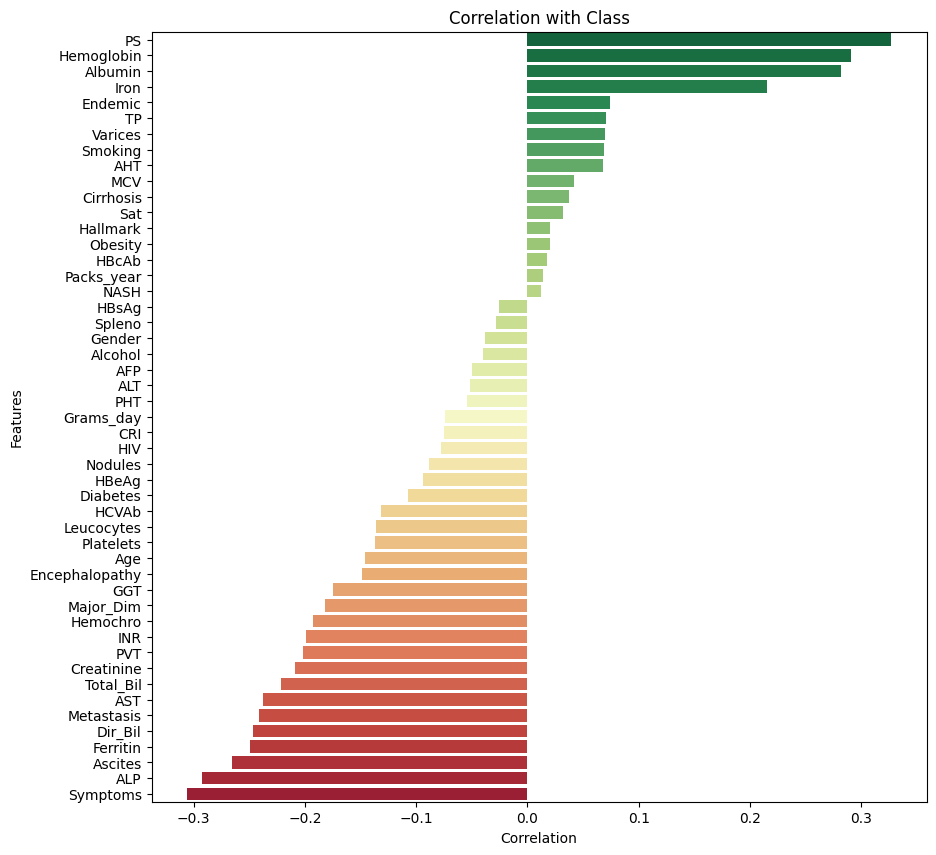

In [87]:
# Sort the correlations in descending order
class_corr_object_sorted = hccdf_transformed.corr()["Class"].drop("Class").sort_values(ascending=False)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
sb.barplot(x=class_corr_object_sorted.values, y=class_corr_object_sorted.index,palette=sb.color_palette("RdYlGn", n_colors=len(class_corr_object_sorted))[::-1])
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Correlation with Class')
plt.show()

## Step 5: Classification

[[ go back to the top ]](#Table-of-contents)

Having arived at this final step we have to set a plan to follow in order to do a good job.

>What machine models will we be using?

When it comes to choosing a model, our group had 3 in mind: **Decision Tree**, **KNN** and **RandomForest**, each with their advantages and disadvantages.
* **Decision Trees**: might be great for their simplicity but as they thrive in that departament, they lack when it comes to dealing with the overfitting problem (model is useful in reference only to its initial data set, and not to any other data sets).
* **KNN**: on the other hand, is very effective with proper distance metric, but since 50% of our dataset is composed of string-like data, we already expect that it's not going to yield incredible results.
* **Random Forest**: from what we understood on how it works and it's capabilities of handling large datasets and high-dimensional spaces well and being able to model complex relationships.

>How many cases will we use for the testing our model after being trained?

We agreed on 20% of the cases being used to test the model.

>What evaluation metric we'll we be using?

Since we are working with umbalanced labels, we are planning to use several evaluation metrics them being:

* **Accuracy**: is a general metric that provides an overall assessment of model performance. However, it might not be suitable for imbalanced datasets, where the majority class dominates.
* **Precision**: is useful when the cost of false positives is high, and we want to minimize false positive predictions.
* **Recall** is valuable when the cost of false negatives is high, and we want to minimize false negative predictions.
* **F1 Score** is useful when you want to consider both false positives and false negatives in the evaluation, especially in imbalanced datasets.
* **ROC-AUC** is valuable for evaluating the trade-off between sensitivity (true positive rate) and specificity (true negative rate) across different threshold values.

>How we'll we deal with the problem of overfitting?

We learned that strategies such as cross validation and stratified k fold vross validation help reduce the likelihood of overfitting.

----

First we'll import every functions from sklearn that we need to create our model.

In [88]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

Then we'll create DecisionTreeClassifier model evaluated on every metric defined earlier.

Accuracy: 0.61
Precision: 0.71
Recall: 0.60
F1 Score: 0.65
ROC AUC Score: 0.58
Confusion Matrix:
[[ 8  5]
 [ 8 12]]
Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2}
Best cross-validated ROC AUC: 0.57


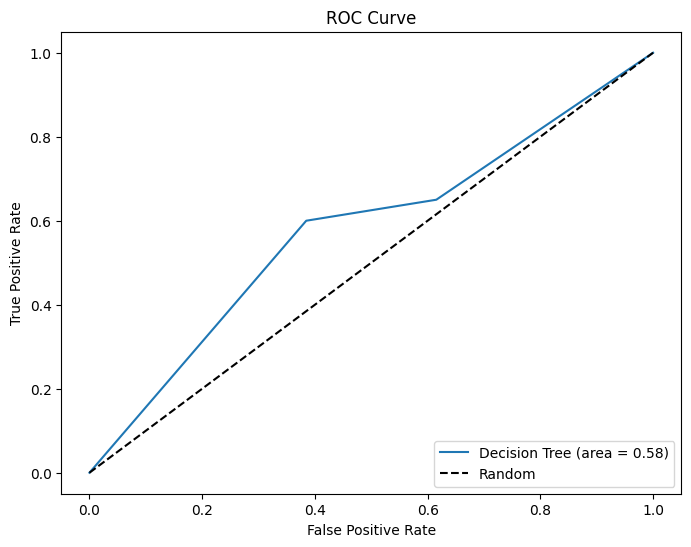

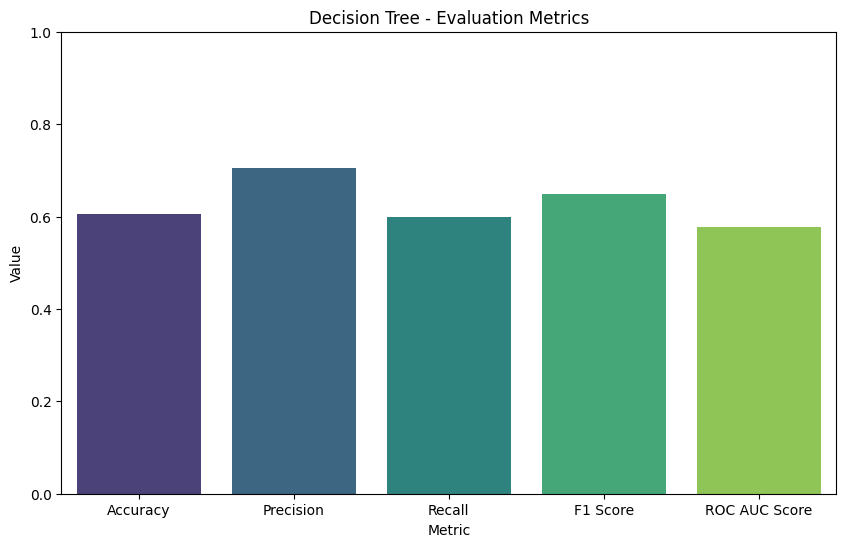

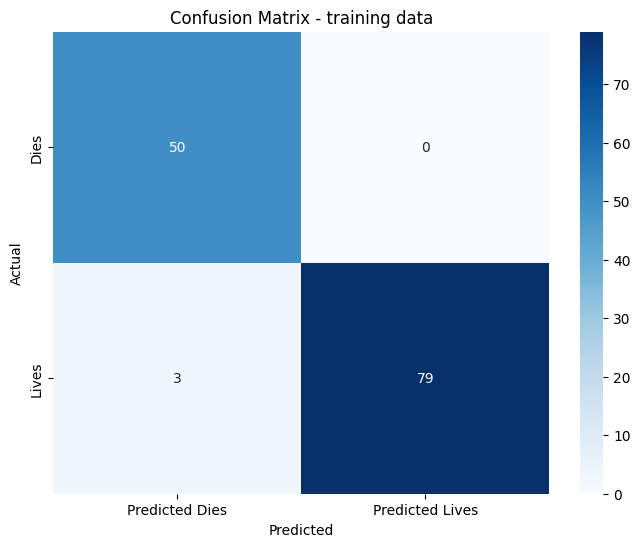

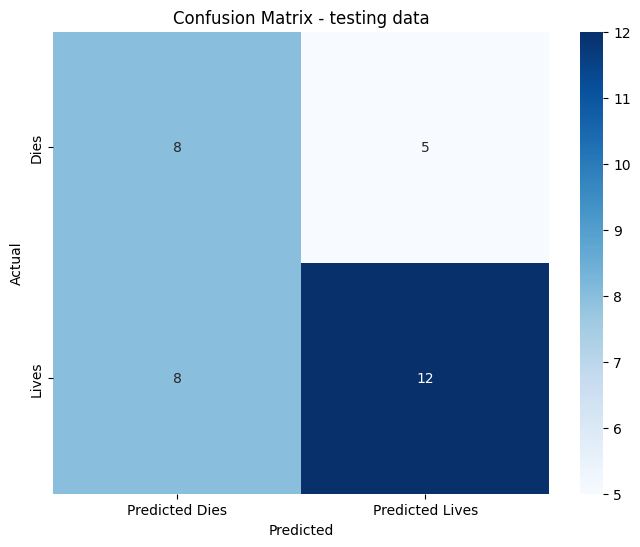

In [103]:
# Decision Tree

# Carregar o conjunto de dados
df = pd.read_csv('hcc_dataset_clean.csv')

# Definir a matriz de recursos e o vetor alvo
target_column = 'Class'
X = df.drop(columns=[target_column])
y = df[target_column]

# Definir o pré-processador
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

# Criar o pipeline do modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o grid de parâmetros e realizar a busca aleatória de hiperparâmetros
param_dist = {
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Avaliar o melhor modelo encontrado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas de avaliação
test_accuracy = accuracy_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, pos_label='Lives')
test_recall = recall_score(y_test, y_pred_best, pos_label='Lives')
test_f1 = f1_score(y_test, y_pred_best, pos_label='Lives')
test_roc_auc = roc_auc_score(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)

print(f'Accuracy: {test_accuracy:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print(f'F1 Score: {test_f1:.2f}')
print(f'ROC AUC Score: {test_roc_auc:.2f}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best)}')
print(f'Best parameters: {random_search.best_params_}')

# Validação cruzada
cross_val_scores = cross_val_score(best_model, X, y, cv=10, scoring='roc_auc')
print(f'Best cross-validated ROC AUC: {cross_val_scores.mean():.2f}')

# Plotar a curva ROC
fpr, tpr, _ = roc_curve(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotar métricas de avaliação
metrics = {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1, 'ROC AUC Score': test_roc_auc}
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
plt.figure(figsize=(10, 6))
sb.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Decision Tree - Evaluation Metrics')
plt.ylabel('Value')
plt.show()

# Plot confusion matrix for the training data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_train, best_model.predict(X_train)), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - training data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot confusion matrix for the testing data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_best), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - testing data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now we'll do the same for RandomForest and KNN.

Accuracy: 0.73
Precision: 0.74
Recall: 0.85
F1 Score: 0.79
ROC AUC Score: 0.76
Confusion Matrix:
[[ 7  6]
 [ 3 17]]
Best parameters: {'classifier__bootstrap': True, 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 90}
Best cross-validated ROC AUC: 0.84


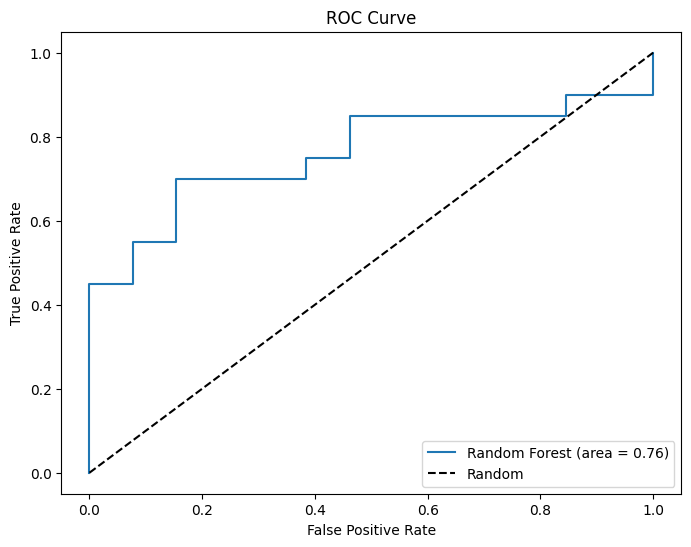

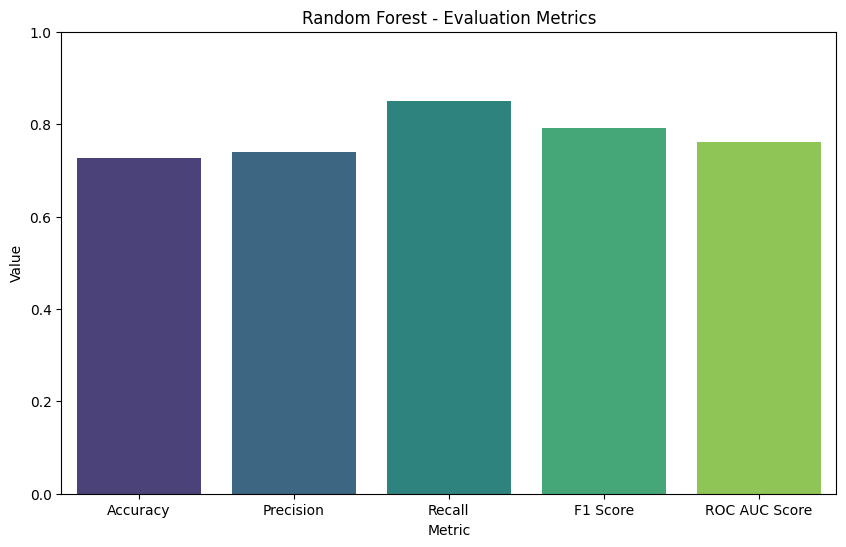

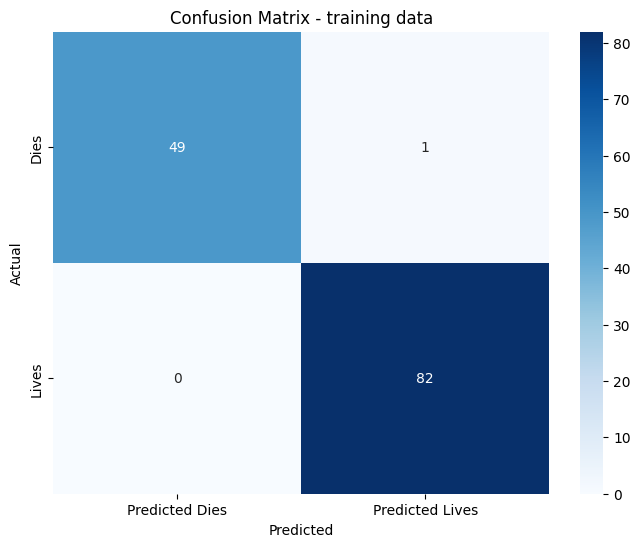

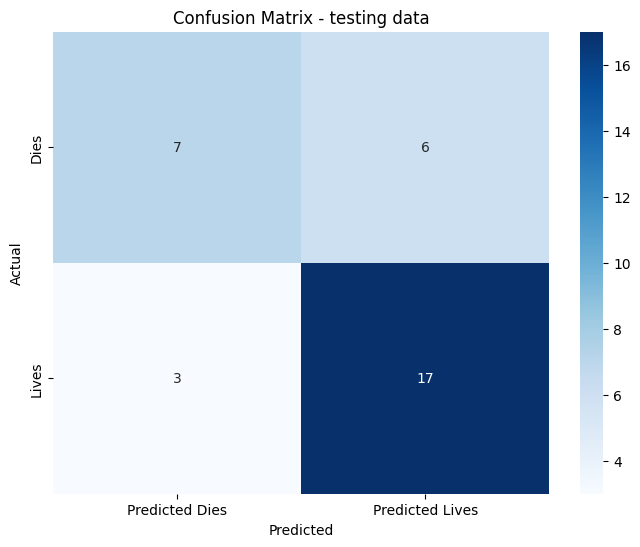

In [104]:
#Random Forest

# Carregar o conjunto de dados
df = pd.read_csv('hcc_dataset_clean.csv') 

# Definir a coluna alvo corretamente
target_column = 'Class'  # Ajuste para o nome correto da coluna alvo

# Definir a matriz de recursos e o vetor alvo
X = df.drop(columns=[target_column])
y = df[target_column]

# Identificar as colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Definir o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

# Criar um pipeline que primeiro transforma os dados e depois ajusta o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o grid de parâmetros para a busca aleatória
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

# Realizar a busca aleatória de hiperparâmetros
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Avaliar o melhor modelo encontrado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular e imprimir as métricas de avaliação no conjunto de teste
test_accuracy = accuracy_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, pos_label='Lives')
test_recall = recall_score(y_test, y_pred_best, pos_label='Lives')
test_f1 = f1_score(y_test, y_pred_best, pos_label='Lives')
test_roc_auc = roc_auc_score(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print('Accuracy: {:.2f}'.format(test_accuracy))
print('Precision: {:.2f}'.format(test_precision))
print('Recall: {:.2f}'.format(test_recall))
print('F1 Score: {:.2f}'.format(test_f1))
print('ROC AUC Score: {:.2f}'.format(test_roc_auc))
print('Confusion Matrix:')
print(conf_matrix)

# Imprimir os melhores parâmetros encontrados
print('Best parameters: {}'.format(random_search.best_params_))

# Realizar a validação cruzada para obter a acurácia média
cross_val_scores = cross_val_score(best_model, X, y, cv=10, scoring='roc_auc')
print('Best cross-validated ROC AUC: {:.2f}'.format(cross_val_scores.mean()))

# Plotar a curva ROC
fpr, tpr, thresholds = roc_curve(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(test_roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotar as métricas de avaliação
metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1,
    'ROC AUC Score': test_roc_auc
}

# Converter as métricas para um DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Plotar as métricas usando seaborn
plt.figure(figsize=(10, 6))
sb.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Random Forest - Evaluation Metrics')
plt.ylabel('Value')
plt.show()

# Plot confusion matrix for the training data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_train, best_model.predict(X_train)), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - training data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot confusion matrix for the testing data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_best), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - testing data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy: 0.67
Precision: 0.70
Recall: 0.80
F1 Score: 0.74
ROC AUC Score: 0.68
Confusion Matrix:
[[ 6  7]
 [ 4 16]]
Best parameters: {'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best cross-validated ROC AUC: 0.80
Training set accuracy: 1.00
Cross-validated ROC AUC: 0.77
Mean training set ROC AUC (cross-validated): 1.00
Mean test set ROC AUC (cross-validated): 0.77


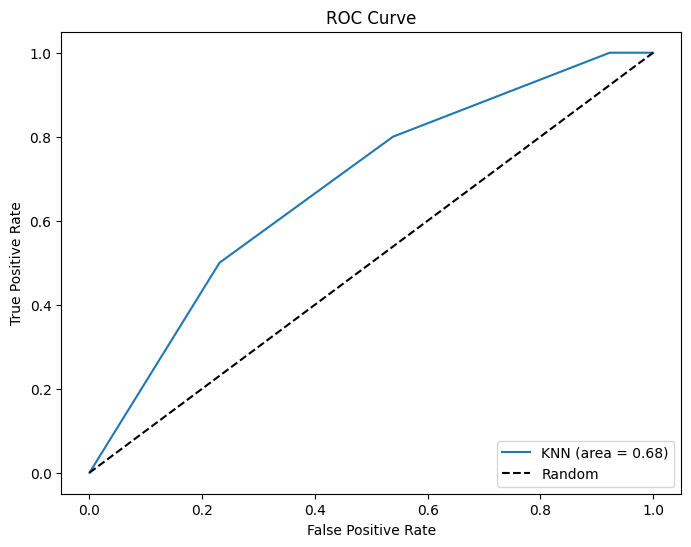

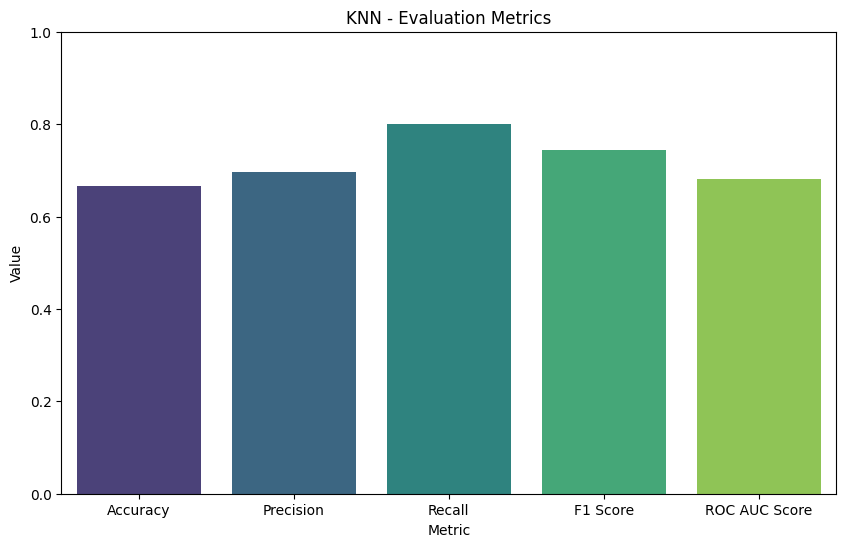

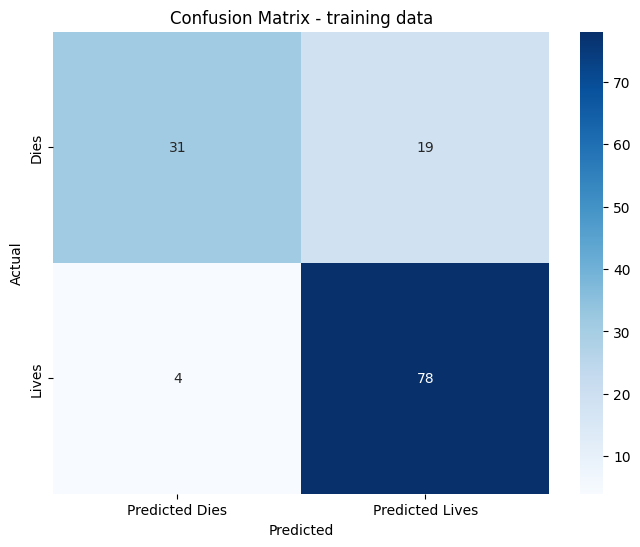

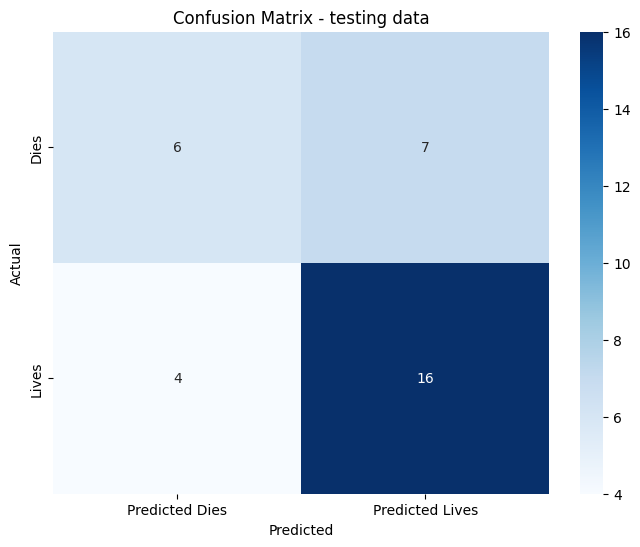

In [105]:
# KNN

# Carregar o conjunto de dados
df = pd.read_csv('hcc_dataset_clean.csv')

# Definir a matriz de recursos e o vetor alvo
target_column = 'Class'
X = df.drop(columns=[target_column])
y = df[target_column].map({'Dies': 0, 'Lives': 1})

# Definir o pré-processador
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

# Criar o pipeline do modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir o grid de parâmetros e realizar a busca aleatória de hiperparâmetros
param_dist = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Avaliar o melhor modelo encontrado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas de avaliação
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, pos_label=1)
recall = recall_score(y_test, y_pred_best, pos_label=1)
f1 = f1_score(y_test, y_pred_best, pos_label=1)
roc_auc = roc_auc_score(y_test.apply(lambda x: 1 if x == 1 else 0), y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

# Ajuste de Hiperparâmetros com GridSearchCV
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]
}
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validated ROC AUC: {grid_search.best_score_:.2f}')

# Avaliação de Overfitting
train_accuracy = accuracy_score(y_train, grid_search.predict(X_train))
print(f'Training set accuracy: {train_accuracy:.2f}')

# Avaliação Cruzada Avançada
cross_val_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10, scoring='roc_auc')
print(f'Cross-validated ROC AUC: {cross_val_scores.mean():.2f}')

# Avaliação de Overfitting Cruzada
train_scores, test_scores = [], []
cv = StratifiedKFold(n_splits=10)
for train_index, test_index in cv.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    grid_search.best_estimator_.fit(X_train_fold, y_train_fold)
    train_scores.append(roc_auc_score(y_train_fold, grid_search.best_estimator_.predict_proba(X_train_fold)[:, 1]))
    test_scores.append(roc_auc_score(y_test_fold, grid_search.best_estimator_.predict_proba(X_test_fold)[:, 1]))

print(f'Mean training set ROC AUC (cross-validated): {sum(train_scores) / len(train_scores):.2f}')
print(f'Mean test set ROC AUC (cross-validated): {sum(test_scores) / len(test_scores):.2f}')

# Plotar a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotar as métricas de avaliação
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC Score': roc_auc}
metrics_df = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])

plt.figure(figsize=(10, 6))
sb.barplot(x='Metric', y='Value', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('KNN - Evaluation Metrics')
plt.ylabel('Value')
plt.show()

# Plot confusion matrix for the training data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_train, best_model.predict(X_train)), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - training data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Plot confusion matrix for the testing data using seaborn
conf_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_best), index=['Dies', 'Lives'], columns=['Predicted Dies', 'Predicted Lives'])

plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - testing data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now let's compile every evaluation metric into one figure that also compares each model.

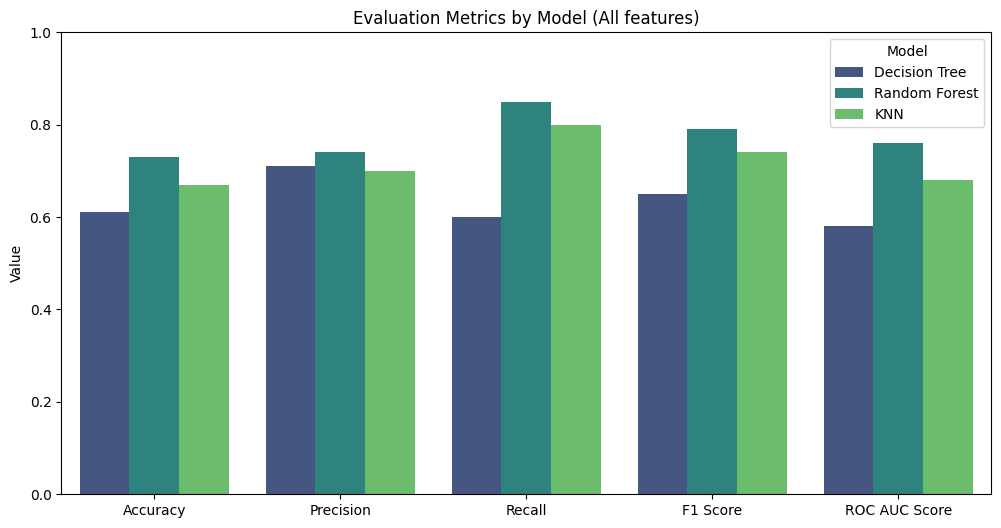

In [95]:
# GRÁFICO DE COMPARAÇÃO DOS VALORES DAS MÉTRICAS NOS 3 MODELOS

# Valores All features
decision_tree_accuracy = 0.610
decision_tree_precision = 0.710
decision_tree_recall = 0.600
decision_tree_f1 = 0.650
decision_tree_roc_auc = 0.580

random_forest_accuracy = 0.730
random_forest_precision = 0.740
random_forest_recall = 0.850
random_forest_f1 = 0.790
random_forest_roc_auc = 0.760

knn_accuracy = 0.670
knn_precision = 0.700
knn_recall = 0.800
knn_f1 = 0.740
knn_roc_auc = 0.680

# Definir as métricas para os três modelos
metrics_decision_tree = {
    'Accuracy': decision_tree_accuracy,
    'Precision': decision_tree_precision,
    'Recall': decision_tree_recall,
    'F1 Score': decision_tree_f1,
    'ROC AUC Score': decision_tree_roc_auc
}

metrics_random_forest = {
    'Accuracy': random_forest_accuracy,
    'Precision': random_forest_precision,
    'Recall': random_forest_recall,
    'F1 Score': random_forest_f1,
    'ROC AUC Score': random_forest_roc_auc
}

metrics_knn = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1,
    'ROC AUC Score': knn_roc_auc
}

# Converter métricas para DataFrames
metrics_df_decision_tree = pd.DataFrame(list(metrics_decision_tree.items()), columns=['Metric', 'Decision Tree'])
metrics_df_random_forest = pd.DataFrame(list(metrics_random_forest.items()), columns=['Metric', 'Random Forest'])
metrics_df_knn = pd.DataFrame(list(metrics_knn.items()), columns=['Metric', 'KNN'])

# Juntar os DataFrames em um único DataFrame
metrics_df = pd.merge(metrics_df_decision_tree, metrics_df_random_forest, on='Metric')
metrics_df = pd.merge(metrics_df, metrics_df_knn, on='Metric')

# Plotar o gráfico tripartido
plt.figure(figsize=(12, 6))
sb.barplot(x='Metric', y='value', hue='variable', data=pd.melt(metrics_df, ['Metric']), palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics by Model (All features)')
plt.ylabel('Value')
plt.xlabel('')
plt.legend(title='Model', loc='upper right')
plt.show()

In this case we considered every feature possible. 

However, as we saw before, many features end up not being that relevant when compared to other so let's do and experiment and **remove** the last **12 least important features** and see how much the evaluation metrics' values change.

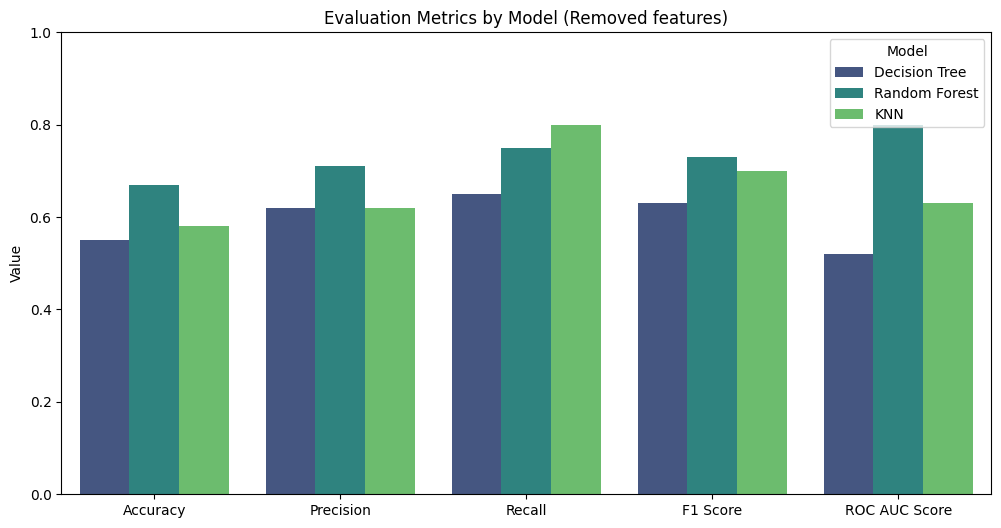

In [96]:
# GRÁFICO DE COMPARAÇÃO DOS VALORES DAS MÉTRICAS NOS 3 MODELOS

decision_tree_accuracy = 0.550
decision_tree_precision = 0.620
decision_tree_recall = 0.650
decision_tree_f1 = 0.630
decision_tree_roc_auc = 0.520

random_forest_accuracy = 0.670
random_forest_precision = 0.710
random_forest_recall = 0.750
random_forest_f1 = 0.730
random_forest_roc_auc = 0.800

knn_accuracy = 0.580
knn_precision = 0.620
knn_recall = 0.800
knn_f1 = 0.700
knn_roc_auc = 0.630

# Definir as métricas para os três modelos
metrics_decision_tree = {
    'Accuracy': decision_tree_accuracy,
    'Precision': decision_tree_precision,
    'Recall': decision_tree_recall,
    'F1 Score': decision_tree_f1,
    'ROC AUC Score': decision_tree_roc_auc
}

metrics_random_forest = {
    'Accuracy': random_forest_accuracy,
    'Precision': random_forest_precision,
    'Recall': random_forest_recall,
    'F1 Score': random_forest_f1,
    'ROC AUC Score': random_forest_roc_auc
}

metrics_knn = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F1 Score': knn_f1,
    'ROC AUC Score': knn_roc_auc
}

# Converter métricas para DataFrames
metrics_df_decision_tree = pd.DataFrame(list(metrics_decision_tree.items()), columns=['Metric', 'Decision Tree'])
metrics_df_random_forest = pd.DataFrame(list(metrics_random_forest.items()), columns=['Metric', 'Random Forest'])
metrics_df_knn = pd.DataFrame(list(metrics_knn.items()), columns=['Metric', 'KNN'])

# Juntar os DataFrames em um único DataFrame
metrics_df = pd.merge(metrics_df_decision_tree, metrics_df_random_forest, on='Metric')
metrics_df = pd.merge(metrics_df, metrics_df_knn, on='Metric')

# Plotar o gráfico tripartido
plt.figure(figsize=(12, 6))
sb.barplot(x='Metric', y='value', hue='variable', data=pd.melt(metrics_df, ['Metric']), palette='viridis')
plt.ylim(0, 1)
plt.title('Evaluation Metrics by Model (Removed features)')
plt.ylabel('Value')
plt.xlabel('')
plt.legend(title='Model', loc='upper right')
plt.show()

Since the number of cases was relatively low, at first, it was reasonable to conclude that a single splitting of the data 80/20 happened to work quite "well" for the Random Forest model. However, as we noticed that our data may be overfitting we decided that it would be important to also consider other techniques of shuffling/spliting of the data, as not to only depend on a single split of the data.

In our previous models, when splitting the data in training and testing data, we were only choosing one small subset of data to become the testing set and a larger amount of data to become the training set. However, what if we had a way of **creating multiple subsets**, each with different combinations of cases to form the testing data, in order to get a **more realistic estimate of the model's performance** on unseen data. That's what cross validation and stratified k-fold are used for and we'll apply them to our Random Forest model since it seems to be the most efficient.

If you evaluated your model's performance on the training data or on a single train-test split, the **model might have been overfitting to that specific dataset**, meaning the model learns not only the underlying patterns but also the noise in the training data, **leading to artificially high performance metrics**. 

When cross-validation is applied, the model is trained and evaluated on multiple subsets of the data, **reducing the risk of overfitting** and providing a more realistic estimate of the model's performance on unseen data. This typically results in lower, but more reliable, performance metrics.

In [97]:
# COMPARAÇÃO DOS VALORES DAS MÉTRICAS NO DECISION TREE UTILIZANDO DIFERENTES ALTERNATIVAS

# Carregar o conjunto de dados
df = pd.read_csv('hcc_dataset_clean.csv')

# Definir a coluna alvo corretamente
target_column = 'Class'

# Definir a matriz de recursos e o vetor alvo
X = df.drop(columns=[target_column])
y = df[target_column]

# Identificar as colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Definir o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

# Criar um pipeline que primeiro transforma os dados e depois ajusta o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir o grid de parâmetros para a busca aleatória
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

# 1. Análise Normal com test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

metrics_normal = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, pos_label='Lives'),
    'recall': recall_score(y_test, y_pred, pos_label='Lives'),
    'f1': f1_score(y_test, y_pred, pos_label='Lives'),
    'roc_auc': roc_auc_score(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)
}

# 2. Cross Validation
cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
metrics_cv = {
    'accuracy': np.mean(cv_results),
    'precision': np.mean(cross_val_score(model, X, y, cv=5, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(model, X, y, cv=5, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(model, X, y, cv=5, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(model, X, y, cv=5, scoring='roc_auc'))
}

# 3. Stratified Cross Validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics_stratified_cv = {
    'accuracy': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='accuracy')),
    'precision': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='roc_auc'))
}

# 4. Melhor Modelo com Hiperparâmetros Ajustados + Stratified Cross Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

metrics_best_stratified_cv = {
    'accuracy': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='accuracy')),
    'precision': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='roc_auc'))
}

# Printar os resultados
print('Metrics with test_size=0.2:')
print(metrics_normal)
print('\nMetrics with Cross Validation:')
print(metrics_cv)
print('\nMetrics with Stratified Cross Validation:')
print(metrics_stratified_cv)
print('\nMetrics with Best Parameters and Stratified Cross Validation:')
print(metrics_best_stratified_cv)

Metrics with test_size=0.2:
{'accuracy': 0.6666666666666666, 'precision': 0.7368421052631579, 'recall': 0.7, 'f1': 0.717948717948718, 'roc_auc': 0.7365384615384616}

Metrics with Cross Validation:
{'accuracy': 0.7212121212121213, 'precision': 0.715423297338259, 'recall': 0.6889926739926739, 'f1': 0.6886520976842052, 'roc_auc': 0.7876739926739926}

Metrics with Stratified Cross Validation:
{'accuracy': 0.6909090909090909, 'precision': 0.6738811802232855, 'recall': 0.659084249084249, 'f1': 0.6604192104192104, 'roc_auc': 0.7901770451770451}

Metrics with Best Parameters and Stratified Cross Validation:
{'accuracy': 0.696969696969697, 'precision': 0.6792574398226572, 'recall': 0.6546520146520146, 'f1': 0.6552136723078916, 'roc_auc': 0.7912820512820513}


In [98]:
# COMPARAÇÃO DOS VALORES DAS MÉTRICAS NO RANDOMFOREST, 38 features

# Carregar o conjunto de dados
df = pd.read_csv('hcc_dataset_clean_semtudo.csv')

# Definir a coluna alvo corretamente
target_column = 'Class'

# Definir a matriz de recursos e o vetor alvo
X = df.drop(columns=[target_column])
y = df[target_column]

# Identificar as colunas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Definir o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ]
)

# Criar um pipeline que primeiro transforma os dados e depois ajusta o modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir o grid de parâmetros para a busca aleatória
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': randint(3, 20),
    'classifier__min_samples_split': randint(2, 11),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__bootstrap': [True, False]
}

# 1. Análise Normal com test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

metrics_normal = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, pos_label='Lives'),
    'recall': recall_score(y_test, y_pred, pos_label='Lives'),
    'f1': f1_score(y_test, y_pred, pos_label='Lives'),
    'roc_auc': roc_auc_score(y_test.apply(lambda x: 1 if x == 'Lives' else 0), y_pred_prob)
}

# 2. Cross Validation
cv_results = cross_val_score(model, X, y, cv=5, scoring='accuracy')
metrics_cv = {
    'accuracy': np.mean(cv_results),
    'precision': np.mean(cross_val_score(model, X, y, cv=5, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(model, X, y, cv=5, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(model, X, y, cv=5, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(model, X, y, cv=5, scoring='roc_auc'))
}

# 3. Stratified Cross Validation
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
metrics_stratified_cv = {
    'accuracy': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='accuracy')),
    'precision': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(model, X, y, cv=stratified_cv, scoring='roc_auc'))
}

# 4. Melhor Modelo com Hiperparâmetros Ajustados + Stratified Cross Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

metrics_best_stratified_cv = {
    'accuracy': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='accuracy')),
    'precision': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='precision_macro')),
    'recall': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='recall_macro')),
    'f1': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='f1_macro')),
    'roc_auc': np.mean(cross_val_score(best_model, X, y, cv=stratified_cv, scoring='roc_auc'))
}

# Printar os resultados
print('Metrics with test_size=0.2:')
print(metrics_normal)
print('\nMetrics with Cross Validation:')
print(metrics_cv)
print('\nMetrics with Stratified Cross Validation:')
print(metrics_stratified_cv)
print('\nMetrics with Best Parameters and Stratified Cross Validation:')
print(metrics_best_stratified_cv)

Metrics with test_size=0.2:
{'accuracy': 0.696969696969697, 'precision': 0.7272727272727273, 'recall': 0.8, 'f1': 0.7619047619047619, 'roc_auc': 0.798076923076923}

Metrics with Cross Validation:
{'accuracy': 0.7333333333333334, 'precision': 0.7297168333229714, 'recall': 0.7020879120879121, 'f1': 0.7045803358996763, 'roc_auc': 0.8152136752136752}

Metrics with Stratified Cross Validation:
{'accuracy': 0.7151515151515152, 'precision': 0.69780675464886, 'recall': 0.6961172161172161, 'f1': 0.6965452460863938, 'roc_auc': 0.7893223443223443}

Metrics with Best Parameters and Stratified Cross Validation:
{'accuracy': 0.7272727272727273, 'precision': 0.716098814229249, 'recall': 0.6917032967032967, 'f1': 0.6972020800231113, 'roc_auc': 0.8078266178266178}


There are many conclusions we can take out from these results.

For the purposes of making it easier to showcase the results explicitly without graphs in a way that makes it extremely easy to identify which model yielded the best results and to if removing the 12 columns really did have a positive effect on the general effectiveness of our models I'll be using Excel.

**50 features**

<img src="images/all_features_results.png" style="width:1000px" />

**38 features**

<img src="images/removed_features_results.png" style="width:1000px" />




**Conclusions:**

* On what regard the tables of results results on the left:
    * the **recall** evaluation metric takes the spot as the one to score the highest value and that is due to most of the cases being labelled as "Lives" which in return makes it so that, after the model being trained, it is going to predict a higher number of times that the patient "Lives" (positive) than it is going to predict that the patient dies (negative). Since, as I mentioned before, the data is unbalanced to the positive side, there will be a **low number of false negatives** and the model will in fact get right most of the test cases leading to a **higher** recall score;
    * the **precision**, on the other hand, suffers as a result of this **bias to the positive side**, leading to **more false positives** as only 60-65% of the data is actually labled as "Lives", **reducing** the overall value of precision;
    * as the imblance seems to be between 60/40 and 65/35, there is still a medium amount of cases labelled "Dies" and as a result, **accuracy** also suffers for the same reason that precision does. Accuracy is overall less informative, while the other metrics provide a more nuanced view of the model's performance;
    * **Random Forest** is clearly the best model since it yielded the best results (Although, decision trees have a slight tendency for overfitting, in this case it was very notable since whenever it predicted that the patient would die, it would get it right 50% of the time; KNN thrives in datasets that are composed of distances and a large sample of numerical data, which is not quite the case for ours);
    * After removing the least influencial features there is a **slight decreasement** on the overall effectiveness of the models.
    
* Onto the tables of results on the right (**model="RandomForestClassifier"**):
    * whenever we resorted to train the model using **cross validation** or **stratified k-fold**, [precision,recall,F1Score] did decreace a little bit, confirming our suspicion from before that our model may be suffering from overfitting caused by an imbalance in the labelling of the cases. Other than that, these low falues may also reflect the increasement in variety which in return increases the possibility for some folds to be more challenging for the model, leading to lower average performance metrics;
    * ROC AUC, on the other hand did maintain it's value rising above it's evaluation metric peers. This however, is actually in line with what was supposed to happen since this metric captures the model’s ability to distinguish between classes more broadly, while precision, recall, and F1-score might decrease because they are influenced by the model’s performance at specific thresholds and the specific distribution of data in each fold of the cross-validation.


**Sumary on Cross validation:**

Cross Validation is very important for these reasons:
* More Realistic Metrics: Cross-validation provides more realistic performance metrics by evaluating the model on different subsets of data, revealing the true generalization ability;
* Detection of Overfitting: It helps detect overfitting by showing how the model performs on unseen data, rather than just the training set;
* Reliable Model Evaluation: While the metrics might decrease, they are more reliable and better reflect how the model will perform in real-world scenarios.


## Conclusion

[[ go back to the top ]](#Table-of-contents)

In this project, we developed a comprehensive data science pipeline to address the problem of predicting the survivability of patients diagnosed with Hepatocellular Carcinoma (HCC) using the clinical data sent by the CHUC. Our approach involved several crucial steps, including data exploration, preprocessing, model training, and evaluation, all explained step by step. Our main goal was to create an efficient machine learning solution capable of determining patient survivability with high accuracy.

We made this notebook desiring it to be as simple and direct as possible, but also checking every step required for a complete assignment. We expect you find it that way. The structured approach we followed ensures that each phase of the data science pipeline is comprehensively covered, providing a solid foundation for future work in this domain.

                                                                              Group 50                                                                              